In [1]:
import pandas as pd
import numpy as np
import konlpy
from konlpy.tag import Twitter
import nltk
from gensim import models
import re
import requests


C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
data = None
for i in range(19):
    if data is None:
        data = pd.read_csv('data/crime{}.csv'.format((i+1)*1000))
    else:
        add_data = pd.read_csv('data/crime{}.csv'.format((i+1)*1000))
        data = data.append(add_data, ignore_index=True)
data = data.drop('Unnamed: 0', 1)       
data = data.set_index('prncYd')
data.shape

(18189, 5)

In [3]:
keywords = {
    1: ['내란'],
    2: ['외환', '간첩'],
    3: ['국기', '국장'],
    4: ['국교', '외국원수', '외국사절'], 
    5: ['범죄단체', '소요'], 
    6: ['폭발물'],
    7: ['공무원', '뇌물', '직무유기', '수뢰', '공무상비밀' , '선거방해'], 
    8: ['공무방해', '공무집행방해' '공무상표시'],
    9: ['도주', '은닉', '도피'],
    10: ['위증', '증거인멸'],
    11: ['무고'],
    12: ['신앙', '사체'],
    13: ['방화', '실화'],
    14: ['일수', '수리'],
    15: ['교통방해', '교통 방해'],
    16: ['음용수'],
    17: ['아편'],
    18: ['통화'],
    19: ['유가증권', '우표', '인지'],
    20: ['문서', '공정증서'],
    21: ['인장'],
    22: ['간통', '공연음란'],
    23: ['도박', '복표'],
    24: ['살인'],
    25: ['상해','폭행', '상해치사', '상해치상'],
    26: ['과실치상', '과실치사'],
    27: ['낙태'],
    28: ['유기', '학대'],
    29: ['체포', '감금'],
    30: ['협박'], 
    31: ['약취', '유인', '인신매매'],
    32: ['강간', '추행'],
    33: ['명예', '모욕'],
    34: ['신용', '업무방해', '경매', '입찰'],
    35: ['비밀침해', '비밀누설'],
    36: ['주거침입', '강제집행면탈'],
    37: ['권리행사'],
    38: ['절도','강도', '강도상해', '강도살인'],
    39: ['사기','공갈', '부당이득'],
    40: ['횡령','배임'],
    41: ['장물'],
    42: ['손괴']
}
data_label = data.copy()

In [4]:
for label in range(42):
    data_label[label + 1] = 0

for index, row in data_label.iterrows():
    print(index)
    for label in range(42):
        for keyword in keywords[label+1]:
            if keyword in str(row.사건명):
                data_label.loc[index, label+1] = 1
                print(keyword)

73888
67312
67316
67151
과실치사
67258
횡령
67135
사기
67223
과실치사
67256
71101
살인
67308
67309
67311
67148
도피
문서
사기
횡령
배임
68369
과실치사
67248
문서
공정증서
사기
배임
67252
67231
사기
67342
67250
67230
67228
67307
강간
강도
67180
67189
폭행
주거침입
67239
67210
67207
67211
사체
살인
유기
67209
강간
67287
67492
67494
67363
67382
도주
67362
업무방해
67493
67504
67428
67717
67769
사기
67771
문서
사기
67513
67510
문서
67514
142159
67496
67381
문서
절도
사기
횡령
67318
사기
67378
배임
67527
강간
67332
도피
살인
공갈
67526
도주
67497
유가증권
사기
67498
강간
67500
177818
배임
67415
67482
뇌물
67601
협박
강간
주거침입
절도
강도
67502
67419
유가증권
문서
신용
사기
배임
67483
68000
67810
67892
67797
68113
주거침입
67813
과실치사
112488
무고
159791
사기
159792
159817
67925
67798
67816
68051
뇌물
67803
도주
68148
67872
공무원
67874
67815
68006
상해
손괴
146480
68054
68055
공갈
68681
업무방해
67929
은닉
사체
살인
강간
68079
횡령
68080
살인
68007
96873
횡령
67804
강간
67920
67786
68137
횡령
68139
상해
강도
강도상해
68104
사기
67754
67756
사기
76895
67795
횡령
67924
유가증권
문서
사기
68112
절도
68115
공무원
67947
업무방해
68043
67618
간통
67853
67891
67811
68002
사기
74778
폭행
68146
뇌물
횡령
배임
6

72406
도피
상해
주거침입
절도
강도
강도상해
72407
72405
살인
72408
문서
72413
강간
72573
72260
72566
72715
직무유기
유기
72564
방화
146232
72580
문서
72581
살인
강도
강도살인
72709
강간
68686
사기
86616
72710
폭행
72404
72574
살인
상해
상해치사
72576
72578
72579
간첩
72555
간첩
72556
72569
72553
강간
72258
살인
72259
72261
72262
72263
살인
72265
강간
72885
101769
강간
73352
명예
공갈
손괴
73611
문서
73612
강간
73339
73340
문서
73342
손괴
73343
73344
뇌물
문서
공정증서
73349
73353
살인
강도
강도살인
73610
과실치상
73387
73388
상해
상해치사
73377
공정증서
인장
73615
간첩
73616
73341
73354
장물
73355
방화
문서
주거침입
절도
사기
73356
강간
73358
상해
강도
강도상해
73613
절도
73389
살인
73390
73391
문서
73393
문서
횡령
73394
73378
낙태
153516
문서
73614
73110
강간
73112
문서
73117
살인
73119
72883
129690
강간
강도
73104
73103
주거침입
절도
장물
73113
72845
73109
72884
살인
73095
문서
73134
111870
72847
도피
절도
73102
폭행
협박
73105
강간
72886
73120
73121
73123
73124
73107
상해
73128
절도
73129
간첩
73130
73098
73106
살인
73131
73108
강간
73132
살인
73135
과실치사
73101
72895
문서
73116
무고
72858
방화
72859
사기
72704
72869
72871
72872
문서
72874
문서
72727
72873
문서
73096
폭발물
살인
73097
72703
72860


76984
76886
살인
77166
직무유기
유기
77167
횡령
76985
77492
상해
강간
절도
강도
강도상해
76979
76980
폭행
77302
사기
77303
77304
문서
절도
장물
77457
업무방해
77458
공정증서
77459
사기
75038
강간
강도
77493
절도
사기
횡령
77091
도박
76888
살인
상해
상해치사
76890
절도
76892
교통방해
76986
과실치사
76987
직무유기
유기
76988
77079
추행
77197
신용
108305
77092
배임
77093
실화
73400
유가증권
사기
횡령
78286
업무방해
강제집행면탈
사기
횡령
배임
78880
공무상비밀
비밀누설
79096
감금
78883
공무상비밀
비밀누설
78894
배임
78895
사기
횡령
78896
문서
78898
사기
배임
78899
79020
강간
추행
79021
상해
폭행
추행
권리행사
79022
배임
166054
79085
78289
78290
업무방해
강제집행면탈
사기
횡령
배임
78988
79181
79182
강간
79283
사기
79285
79211
폭행
79217
강간
79287
뇌물
79326
명예
79143
79144
149924
149954
사기
장물
79289
78574
강간
78748
78749
배임
78974
78975
78977
횡령
배임
78979
배임
78981
뇌물
수뢰
79008
79009
79010
업무방해
입찰
79011
79012
강간
추행
78762
약취
유인
주거침입
절도
강도
78930
78860
78861
78862
78863
뇌물
79013
상해
폭행
추행
권리행사
79015
강제집행면탈
78287
78428
사기
배임
78430
78604
79095
절도
횡령
78867
뇌물
78978
78750
횡령
78751
업무방해
78752
강간
주거침입
78753
약취
유인
주거침입
절도
강도
78754
78271
사기
78283
78284
절도
78285
78594
사기
78595
78596
78597

85016
문서
사기
84955
배임
126196
공무상비밀
비밀누설
권리행사
85242
사기
105675
간통
85402
85244
살인
85430
72851
85348
사기
횡령
85350
문서
85243
125983
명예
85268
85403
과실치사
85431
85351
85245
사기
배임
69228
85353
도박
사기
69785
85528
약취
유인
85482
85399
문서
85352
뇌물
85354
85378
85247
126022
절도
85428
85429
85377
85434
사기
85182
살인
낙태
85329
사기
85190
85277
상해
폭행
85186
상해
폭행
업무방해
주거침입
공갈
손괴
85299
85304
85238
85216
85328
손괴
85249
문서
85506
업무방해
85433
85404
85274
85301
문서
사기
85302
85240
문서
공정증서
사기
85303
85275
85184
85251
절도
85215
문서
사기
횡령
85703
85704
103090
85590
85618
배임
68956
도주
상해
강간
125996
강간
68023
뇌물
85572
85552
명예
85642
상해
절도
강도
강도상해
85574
배임
85622
사기
85589
85571
사기
85573
125979
153214
상해
강도
강도상해
85658
85591
85659
배임
85553
문서
사기
배임
85679
85641
85619
85730
강제집행면탈
85620
문서
125984
125990
126025
상해
85557
절도
85607
공무상비밀
비밀누설
85551
유기
85644
일수
85594
배임
125985
문서
사기
85458
절도
손괴
85504
배임
173259
173260
173261
173262
85507
강간
주거침입
85459
간첩
85462
문서
85486
85487
업무방해
주거침입
85509
126023
85481
위증
86306
문서
사기
85508
약취
유인
주거침입
절도
강도
85527
855

154722
상해
강도
157367
92176
공정증서
92178
상해
폭행
상해치사
92952
절도
93096
문서
93097
강도
154615
유가증권
사기
92630
92995
92013
배임
92014
강도
91877
강간
91874
93034
93065
입찰
배임
92074
주거침입
절도
강도
92009
92103
91955
92349
92073
위증
유가증권
92166
과실치상
155040
154619
유가증권
155033
문서
배임
154835
강간
절도
154828
173232
173233
157377
직무유기
살인
유기
92164
91873
문서
92530
뇌물
수뢰
배임
74809
92486
과실치상
92211
약취
92010
157688
91956
강도
91957
과실치상
166272
사기
횡령
92319
간첩
154750
간통
119658
153345
과실치사
155008
과실치사
92072
뇌물
직무유기
수뢰
유기
횡령
92007
문서
121827
상해
절도
92644
155034
사기
횡령
156857
간첩
155242
92071
강간
154966
폭행
155212
91872
절도
91951
91584
154997
155037
배임
157251
155194
155207
문서
155247
권리행사
92061
무고
155184
살인
155568
155525
148139
강간
155211
입찰
155222
155190
155569
공무상비밀
비밀누설
92060
공무원
사기
73392
도피
상해
주거침입
절도
강도
강도상해
155201
92011
강제집행면탈
92012
155462
155528
155530
횡령
91870
155249
위증
96530
과실치사
92076
157301
155592
공정증서
강제집행면탈
157441
155205
92378
91944
횡령
154610
직무유기
문서
유기
155565
문서
120014
추행
155067
사기
91927
뇌물
92059
수뢰
92030
주거침입
절도
125426
92003
문서
사기
횡

96531
무고
67980
횡령
배임
97113
강간
추행
97115
사기
횡령
배임
96862
은닉
95935
뇌물
공무상비밀
비밀누설
96102
99785
배임
96034
165266
간첩
96005
뇌물
96195
95708
상해
상해치사
95320
96142
95284
95896
신용
95936
횡령
95706
무고
96275
96276
공갈
75441
95286
절도
95742
소요
인장
96452
96380
절도
96161
협박
95687
절도
155018
사기
95937
횡령
96071
70624
상해
96381
배임
96193
96194
무고
명예
손괴
95539
96073
95893
횡령
95894
문서
95895
뇌물
95779
살인
96419
문서
공정증서
폭행
사기
96451
무고
96196
139008
상해
강간
절도
강도
강도상해
95446
강간
95851
강제집행면탈
95852
명예
모욕
95737
뇌물
110620
폭행
95897
과실치상
95686
96134
96135
95152
96074
간첩
96075
사기
95891
95778
상해
상해치사
95847
문서
배임
96378
사기
96379
95712
절도
강도
96009
무고
명예
95848
95850
사기
95889
95928
사기
97170
134225
문서
95803
문서
공정증서
사기
95804
문서
95444
상해
손괴
95931
95932
문서
공정증서
96006
위증
95849
위증
96679
96681
96448
96449
횡령
96450
명예
96642
유가증권
사기
96643
감금
98145
155223
뇌물
96384
96069
96070
95930
장물
96007
위증
95887
95734
사체
상해
상해치사
유기
95732
96644
사기
96476
배임
95660
부당이득
96673
공정증서
인장
96674
과실치상
과실치사
96675
사기
배임
96640
상해
92179
96038
절도
강도
96003
95735
상해
절도
강도
강도상해
95736


절도
100085
100747
100874
100297
100885
100582
도박
99955
99957
상해
상해치사
99958
절도
100182
유가증권
사기
100875
100876
사기
100132
사기
배임
100369
무고
100189
99951
99980
상해
상해치사
100789
횡령
100886
도주
100575
100943
강간
100945
도주
100361
100362
과실치사
100878
뇌물
100133
공정증서
배임
100298
100356
위증
100577
100238
폭행
100125
무고
100301
99956
64751
배임
100621
무고
100026
100134
100190
100887
공정증서
100684
100685
100373
절도
100302
99983
상해
강도
강도상해
100691
상해
강도
강도상해
100027
유가증권
문서
공정증서
사기
100029
100366
무고
100447
문서
사기
100820
100374
100982
100031
문서
손괴
100370
문서
업무방해
사기
횡령
100814
100678
100679
직무유기
유기
100227
사기
100367
99918
문서
99922
사체
살인
유기
강도
강도살인
100680
100681
100303
100287
사기
배임
100788
사기
76448
100128
강간
100129
100187
100088
배임
100930
무고
100627
100818
99953
99954
무고
100178
상해
강간
강도
강도상해
장물
100244
은닉
살인
강간
100584
148312
업무방해
100233
141372
횡령
100291
살인
강도
강도살인
100188
사기
99950
강도
99920
100817
100819
100222
절도
100300
절도
100179
무고
100181
강간
주거침입
69302
살인
폭행
감금
협박
절도
100946
99978
문서
100881
100884
강간
절도
100889
100359
절도
100360
사기
1004

110476
위증
111170
절도
111251
110876
110478
111468
110801
절도
110878
110984
110807
횡령
110804
110508
문서
공정증서
86097
문서
사기
110705
살인
강도
강도살인
110700
도주
신용
절도
사기
110800
강간
110408
110702
사기
111077
110979
110893
무고
명예
횡령
110892
도주
178316
110703
110701
문서
사기
111079
110983
문서
사기
110982
110981
110885
110886
도주
110696
무고
추행
110797
상해
110697
무고
110695
154146
110410
110877
110270
109923
110481
110144
업무방해
절도
110698
문서
109976
명예
110796
상해
상해치사
110798
110706
도주
110148
문서
109984
간첩
110799
강도
110692
상해
109859
횡령
110046
사기
110887
110272
110271
뇌물
109978
도박
상해
강도
강도상해
110265
사기
109977
업무방해
횡령
110267
133510
133466
강간
110146
명예
173246
111069
160631
165479
110482
110143
110407
사기
111166
횡령
111167
111168
111067
문서
공정증서
사기
110625
실화
과실치사
110624
신용
76618
상해
상해치사
111165
111068
살인
상해
상해치사
업무방해
110693
사기
배임
109924
사기
110617
110619
109979
명예
178079
110343
공정증서
입찰
110151
110152
과실치상
110274
109813
100939
상해
강도
강도상해
109865
간통
폭행
109974
신용
110621
109252
공정증서
109257
109973
문서
횡령
109344
무고
153625
간첩
110141
109341
살인
상해
상해치사

118729
118160
사기
횡령
118321
118388
절도
118389
사기
118385
사기
118390
사기
118312
118386
과실치사
118495
118984
도피
118806
118397
강간
118895
118896
118890
도주
118892
간통
117743
업무방해
118396
절도
117695
절도
118384
강도
118478
상해
강도
강도상해
118818
117691
업무방해
118576
사기
118577
118310
118311
사기
배임
118380
횡령
118381
주거침입
절도
118307
횡령
118308
살인
강도
강도살인
118235
도주
118817
178356
강간
주거침입
178409
178420
문서
118578
상해
상해치사
118316
절도
118496
절도
장물
118497
강간
118571
118573
118651
118493
배임
118721
절도
118494
복표
118565
살인
118642
살인
118643
강도
118395
도주
117785
118723
118724
상해
강도
강도상해
118725
상해
절도
강도
강도상해
118726
118722
문서
118644
사기
횡령
배임
118645
102319
118320
도박
118727
118987
118157
뇌물
118486
복표
118988
118989
118814
118816
강간
118811
118394
118903
절도
112049
118812
117536
117535
118901
도주
118902
사기
118485
강간
118985
118986
118807
과실치사
117943
118641
118231
118232
82125
무고
118981
118480
도주
과실치사
118483
118196
상해
폭행
협박
118805
117744
118115
배임
118116
도피
문서
배임
117642
상해
강간
주거침입
117738
117797
문서
절도
사기
117793
117795
117837
절도
사기
117645
감금
강간
118

129716
뇌물
문서
133469
134334
134238
94149
과실치사
134308
사기
120012
95740
폭행
128013
128325
문서
126179
126212
뇌물
105459
권리행사
105511
128291
업무방해
94490
도주
97864
상해
강도
강도상해
119916
69949
상해
강간
추행
주거침입
강도
121064
127674
명예
모욕
128341
도피
80116
도피
128257
105757
76183
강간
76361
86737
과실치사
126130
배임
127672
127704
명예
배임
120945
70475
사기
127706
배임
128260
128268
뇌물
115298
178714
교통방해
155717
사기
155704
직무유기
과실치상
유기
127108
은닉
절도
횡령
126062
업무방해
128050
사기
81327
86778
횡령
96348
위증
무고
배임
128014
128018
128028
뇌물
사기
128029
부당이득
128032
127779
79087
위증
93067
문서
79431
128256
무고
상해
100944
127785
97102
공갈
횡령
100082
뇌물
직무유기
유기
128123
160651
160570
사기
161029
뇌물
127776
도박
120568
73841
99304
도박
감금
107669
상해
강도
강도상해
126361
사기
84932
127991
뇌물
배임
128127
105056
업무방해
96293
공정증서
사기
81099
상해
명예
공갈
108117
업무방해
126083
문서
업무방해
127282
폭행
127784
96636
뇌물
109745
유가증권
문서
절도
사기
127615
127707
유가증권
사기
횡령
128258
사기
128290
절도
127787
배임
69492
73374
상해
강도
강도상해
86793
폭행
권리행사
68870
횡령
71072
128027
128300
127705
119068
업무방해
횡령
72850
72702
방화
80752
폭발물

강도
147683
강간
147684
폭행
148122
배임
148212
권리행사
148155
147382
사기
69230
도주
147914
명예
모욕
148156
146022
문서
공정증서
사기
146650
146651
147367
뇌물
도주
은닉
문서
강제집행면탈
사기
횡령
배임
147383
강제집행면탈
배임
148071
148158
문서
146652
상해
147368
유가증권
148072
배임
148211
공갈
148138
뇌물
협박
사기
146653
배임
147338
사기
147369
사기
장물
155491
문서
155465
139130
148926
업무방해
149517
배임
149731
149297
주거침입
150450
명예
167286
사기
149523
강간
강도
152311
상해
152440
101811
147458
명예
149376
뇌물
횡령
167554
67360
뇌물
사기
149743
위증
무고
배임
167392
133464
147459
사기
149325
사기
149524
149548
업무방해
146248
과실치상
과실치사
96565
문서
149865
강간
추행
149522
방화
교통방해
업무방해
주거침입
손괴
146214
146217
146246
149387
146451
149291
149333
배임
159274
146250
146453
173393
102825
절도
146251
77483
절도
146311
위증
149875
신용
업무방해
149942
상해
146731
상해
강간
절도
149713
공무원
166519
뇌물
배임
167448
배임
146312
사체
살인
유기
강도
강도살인
146642
167731
강간
주거침입
절도
강도
사기
97534
149353
146732
횡령
배임
146313
무고
문서
공정증서
사기
배임
148850
명예
150397
문서
146734
과실치사
150001
107021
절도
148884
146224
도피
강간
강도
146314
공갈
150382
146223
문서
125856
뇌물
무고
문서
신용
사기


166325
배임
164836
강간
171628
사기
171708
171732
신용
171733
168978
172411
172417
강간
172419
문서
107453
폭행
164768
배임
170686
강간
167952
상해
167954
횡령
167960
명예
167964
167999
횡령
169358
사기
168980
무고
사기
횡령
배임
168174
사기
168176
166337
164813
협박
170731
모욕
167991
164983
165016
공무원
165176
170693
166532
업무방해
166229
절도
169204
166234
167267
172423
172434
164857
뇌물
164859
뇌물
상해
폭행
공갈
손괴
164861
상해
업무방해
손괴
166417
업무방해
공갈
118575
168703
도피
172421
164982
무고
협박
공갈
횡령
배임
166425
사기
166496
위증
사기
163705
문서
172751
상해
172497
뇌물
사기
101132
171339
172455
171338
증거인멸
횡령
배임
168937
172753
168071
100296
168076
손괴
169091
문서
사기
169202
사기
횡령
170360
문서
사기
170362
사기
169246
144968
횡령
168366
168367
강간
172511
사기
횡령
164551
뇌물
163740
171473
사기
163971
165871
배임
168474
업무방해
168476
164292
172080
방화
167712
위증
사기
171714
상해
강간
주거침입
163727
방화
살인
163811
169194
사기
횡령
171214
상해
171673
상해
폭행
업무방해
171715
164519
뇌물
170424
67812
165000
상해
169451
무고
사기
횡령
170791
횡령
164898
뇌물
163729
강제집행면탈
사기
168852
170802
169252
간첩
170423
172414
횡령
165676
106628
절도
168

107436
문서
111925
143683
81189
사기
171059
147397
119071
114626
69055
84382
업무방해
100687
사기
70589
업무방해
절도
110990
사기
143626
은닉
장물
147336
무고
문서
배임
173214
증거인멸
업무방해
권리행사
횡령
159837
108959
문서
134212
횡령
76356
165757
유가증권
절도
횡령
146228
170453
공정증서
143591
횡령
115884
64960
161219
165174
강제집행면탈
143593
사기
157102
위증
84988
68524
절도
67759
명예
178115
145127
문서
횡령
142287
뇌물
배임
167512
횡령
배임
92953
160243
문서
108242
유가증권
횡령
110691
뇌물
횡령
128016
문서
공정증서
110507
97352
150569
161051
상해
명예
모욕
124996
문서
97804
136146
70653
95223
97358
163739
84232
공갈
100631
178135
도피
사기
143826
문서
84122
공정증서
117198
사기
배임
99793
문서
171785
145492
뇌물
166330
간첩
98558
횡령
80190
136165
159937
사기
82176
153627
150842
124946
도주
166411
위증
무고
업무방해
배임
93441
무고
134367
148883
84120
97010
98557
123770
명예
159918
84472
문서
공정증서
64559
도박
상해
84938
간통
97445
69355
144239
96098
강간
103847
154741
104879
명예
135793
상해
강간
160398
사기
94484
손괴
69462
강제집행면탈
138994
145773
절도
147395
횡령
103392
횡령
배임
101498
절도
98077
은닉
장물
159900
69487
무고
협박
107224
157286
84183
살인
166033
상해
6

124964
95386
횡령
92274
사기
105889
179265
99034
위증
118238
129613
공무원
97515
72846
101503
69289
횡령
108252
122568
97934
68344
77858
도주
95808
주거침입
절도
104991
명예
횡령
156861
72864
문서
103213
119401
85400
104647
상해
절도
강도
강도상해
86740
80112
업무방해
93338
추행
142019
100585
173273
직무유기
유기
93219
124942
64962
68610
도주
92237
157619
118574
107864
92165
배임
73862
160431
명예
102173
155017
67890
75070
105888
77178
배임
109129
절도
68073
업무방해
횡령
109199
문서
110404
간통
107082
98845
86613
86604
장물
112318
67828
위증
110156
68806
93282
69311
사기
112167
139634
155005
75464
110985
도주
150396
장물
99567
살인
강간
84126
뇌물
99305
실화
과실치상
107861
101981
157307
102254
간첩
82183
폭행
149153
95319
폭행
84234
81016
101694
명예
104742
사기
96867
사기
173377
사기
109198
173275
도피
위증
상해
69090
사기
69288
상해
강간
추행
공갈
67871
위증
무고
횡령
배임
76546
도피
절도
156361
간첩
104188
179633
123771
179652
111169
강간
99106
사기
155236
68412
100626
82931
문서
96994
168595
68019
폭행
공갈
85839
112977
뇌물
100882
86140
93991
123774
97517
68349
98228
105688
68411
100992
간통
살인
105970
사기
배임
112975
101577
절

명예
횡령
83884
도주
117538
장물
116403
위증
문서
폭행
73810
69862
67667
강간
142069
강간
공갈
113745
83962
폭행
협박
107422
71171
83153
횡령
장물
114723
상해
신용
절도
강도
강도상해
사기
104932
복표
179107
69886
83331
배임
132208
81820
72412
상해
강도
강도상해
69810
무고
공정증서
사기
공갈
117786
명예
126507
문서
신용
사기
횡령
배임
114108
사기
67285
113678
공무상비밀
비밀누설
80430
67698
위증
무고
사기
80036
83795
81821
79942
117372
배임
178612
비밀누설
74796
상해
강도
강도상해
173597
공무원
178872
67499
교통방해
업무방해
손괴
69930
상해
강간
절도
강도
강도상해
67718
살인
79384
120805
도주
114111
81596
도주
67550
76983
114727
업무방해
83434
도주
79944
95325
79707
81552
강간
113338
업무방해
117840
사기
횡령
배임
115800
81492
사기
115744
사기
114242
절도
공갈
110160
사기
115358
문서
97770
사기
배임
101703
사기
117898
무고
사기
횡령
129801
97292
123250
도주
117407
배임
108894
무고
115748
사기
108046
절도
173784
직무유기
유기
96389
배임
116476
175413
명예
모욕
79570
사기
96865
사기
106631
강간
68643
문서
사기
배임
114788
67725
추행
120571
67602
명예
114859
배임
153805
절도
113965
81218
상해
강도
강도상해
98356
175499
175500
교통방해
174952
174956
167762
178614
사기
120333
98063
173632
108649
복표
83198
79325
유가증권
사기
배임
1

181621
181646
살인
폭행
강도
강도살인
181647
상해
절도
강도
강도상해
181466
간통
181492
방화
도박
181493
181759
도주
183316
181122
상해
강도
강도상해
181123
181144
181084
181240
절도
181262
무고
181349
입찰
181368
181404
181313
문서
181622
181522
181648
상해
강도
강도상해
181651
명예
181115
181494
문서
181495
181496
181497
181498
절도
183317
권리행사
181124
181125
181153
방화
살인
절도
강도
강도살인
181149
업무방해
181085
181241
181263
181351
181369
181405
횡령
배임
181406
도주
181315
181523
상해
추행
181524
상해
강도
강도상해
181574
181575
폭행
181576
강간
181586
문서
181590
181483
문서
181486
문서
181499
문서
181500
과실치상
181501
사기
181760
폭행
약취
절도
183318
업무방해
181126
181127
문서
181128
181150
사기
179799
181242
횡령
181261
181264
181352
횡령
181370
상해
절도
손괴
181371
181407
사기
횡령
181429
181430
181525
181526
문서
181527
범죄단체
도피
절도
181528
181529
살인
181577
181578
살인
181592
181593
유인
181591
뇌물
181594
절도
181595
강간
강도
181476
문서
신용
절도
사기
횡령
181477
살인
181761
181129
181151
뇌물
181243
절도
181265
절도
181355
179762
181408
살인
상해
상해치사
181425
위증
181431
문서
181530
문서
181531
181532
문서
절도
181571
뇌물
181572
181573
181579
181479

In [5]:
for index, row in data_label.iterrows():
    print(index)
    if  '위반' in str(row.사건명):
        for label in range(42):
                data_label.loc[index, label+1] = 0

73888
67312
67316
67151
67258
67135
67223
67256
71101
67308
67309
67311
67148
68369
67248
67252
67231
67342
67250
67230
67228
67307
67180
67189
67239
67210
67207
67211
67209
67287
67492
67494
67363
67382
67362
67493
67504
67428
67717
67769
67771
67513
67510
67514
142159
67496
67381
67318
67378
67527
67332
67526
67497
67498
67500
177818
67415
67482
67601
67502
67419
67483
68000
67810
67892
67797
68113
67813
112488
159791
159792
159817
67925
67798
67816
68051
67803
68148
67872
67874
67815
68006
146480
68054
68055
68681
67929
68079
68080
68007
96873
67804
67920
67786
68137
68139
68104
67754
67756
76895
67795
67924
68112
68115
67947
68043
67618
67853
67891
67811
68002
74778
68146
67805
67921
67700
67702
67549
67551
67552
67944
67674
67675
67729
67826
67677
67721
67676
67722
67768
67753
67907
67614
67615
67697
67751
67946
67723
67660
67724
67752
67909
67869
67950
67598
67682
67639
67577
67579
67642
67643
67727
67666
67758
67757
67760
67701
67596
67726
67728
67730
67829
67870
67767
67578
680

75060
75061
75062
123852
75073
75075
75342
75343
101902
75331
75088
75076
67257
75047
75050
75051
75071
75058
75468
75469
75017
67147
177767
75043
75045
75046
70883
74794
75021
75024
118647
75025
75027
74803
75031
75032
74801
74808
75015
75028
75029
75034
74784
74795
75030
74804
74805
74806
75033
74807
75056
177822
75078
75035
75036
75037
75042
75044
74790
74791
74800
74799
75077
75080
75039
75040
74788
74792
74793
74786
75041
75020
75022
75023
74787
75886
75788
75680
75679
75779
75780
75681
75791
75873
75782
75783
73835
75790
75682
75874
75875
75675
75683
75792
75684
76078
75781
99798
76079
76080
75877
75878
75670
75671
75301
75692
75880
100815
75786
75676
75678
75881
75882
75883
75884
75885
75872
75456
173557
173558
173559
75887
75888
75889
75300
75890
75302
75458
75672
75673
75674
75312
75677
76082
76083
75997
75462
75322
75323
75324
75326
75327
75294
75451
75452
75453
75295
75455
75328
74158
75307
75325
75329
75330
75440
75454
75457
75296
75297
75298
75299
75459
75460
75774
75775
7

81498
81544
81554
81497
81363
81545
81547
81399
81491
81400
81402
179387
81546
81403
81541
81398
81548
81595
81288
81292
81731
177772
81644
177774
81968
81970
81965
81859
81778
81730
80795
81817
126282
81641
81776
81781
81816
81647
81773
81780
81782
81645
81774
81691
81779
81784
81822
81775
81694
81689
179332
179334
179398
81734
81692
81860
81961
82018
126297
82121
82189
126505
82181
82116
82190
82177
82174
126358
81973
82017
81960
165831
82118
81892
81975
82074
81976
126280
81963
82020
82016
81865
82080
64556
82075
81972
81966
67511
81863
81896
81967
82280
82389
82349
82390
82595
82596
82382
126500
82447
82344
82345
82342
82589
82385
82279
82228
82315
126315
82314
98847
82124
82178
126346
82276
126180
176542
176544
176546
176548
82281
82312
82320
82227
126287
73813
82021
82185
82175
82581
82582
82654
82652
126448
82527
82687
82484
82483
82583
82795
82489
82692
82685
82686
82718
82627
176063
126484
82490
82650
82651
82623
82693
82626
82418
82528
82585
82658
126495
82584
82691
82485
826

152541
152871
154506
153110
154744
154746
154147
152856
154748
154753
152862
154525
154751
152428
153628
82120
158292
152509
153624
167848
165878
167329
167333
153136
87894
167431
167334
145539
88002
153633
167266
87898
153634
153637
153638
153651
152613
168098
153630
168131
167653
153641
74180
154031
87892
167304
167307
167309
167914
153640
154983
153832
154992
155004
155009
142617
154977
154976
141184
154377
154380
155007
155025
153327
155023
155010
88601
154589
154451
154518
154621
155038
155041
154514
155032
152569
154001
154015
153512
125175
154149
153071
152830
76690
154142
154144
156591
153532
70932
154982
154989
157994
154991
155015
154980
156592
155001
155000
155019
154403
156568
156577
154967
155013
154017
153833
101569
158057
153852
153834
153631
153856
154013
154035
153837
88582
153518
153486
153339
153509
153804
92899
153821
73628
112240
158232
109921
154508
154021
72268
173294
74409
156841
154007
99609
154475
153825
157258
156346
156580
154411
154612
157085
153508
75341
1

97862
98235
97994
97623
97005
97006
97003
96999
97525
97526
97802
98251
97930
97824
97863
97773
98009
97104
97105
68765
97627
98072
97931
97535
97536
97537
97776
86119
96832
97601
97172
97412
97408
97410
98083
98134
98284
97598
111462
97664
97667
97709
97173
97103
97447
98008
98285
98070
97825
97276
97274
97669
97624
97625
97444
97446
98007
98131
97826
97928
97278
97271
97272
97783
97267
97990
97991
97671
97705
97521
97524
98082
97929
97999
97599
97531
97355
97356
97399
97397
97398
97468
84872
97273
97778
97265
97262
86117
97626
97800
98067
98068
98162
97357
97532
97533
97549
97546
97547
97367
98239
97360
97097
97619
97657
97660
96294
97053
97610
97616
97465
97466
97226
96934
97060
97658
97659
97661
96598
96599
96297
96330
96331
96498
97761
97763
97607
97460
96827
96766
97164
96601
96602
96634
96635
96637
96499
96501
96324
97287
97463
97464
78660
96829
97165
97225
96237
96241
96597
96564
96295
97461
97462
96761
96760
96765
142811
96272
96296
96327
96758
96762
97346
97719
97713
96825
96

102043
101710
101752
101812
101697
101979
101759
101761
101762
100630
101770
102065
101663
101982
101868
101908
101817
100796
101899
101747
101749
102066
101698
101984
101909
100799
100935
102044
101826
101827
101495
101695
102050
102047
101647
101756
100936
100461
145868
101988
130698
101649
101651
101052
101494
101696
101622
101864
101757
100676
100797
102056
102059
102060
101766
101767
101857
101706
101707
101810
101623
101692
101865
101866
101502
101629
101666
102055
101650
101574
101570
101746
101808
100985
100986
100987
101326
101575
101896
101897
101813
101805
101699
101870
101871
68345
101995
101996
101809
101272
100988
100989
77199
134185
101763
101764
101567
101381
101382
101124
101327
101328
101384
101700
97618
141563
101915
101765
101895
166746
101991
102063
102057
101511
101987
101869
101910
93137
101648
101704
101820
102064
101992
101911
101822
101705
101049
101118
101050
101993
101512
100995
101974
101975
102051
101913
101572
101573
101816
101618
101364
101204
101436
101

105047
177857
105053
105054
104873
104739
84973
104794
104826
104827
104989
104193
105050
105055
104744
105115
105116
104934
104935
104828
104686
108826
109416
107964
108737
108741
108655
108818
109200
108754
109197
108752
108812
109014
108751
108829
108740
108562
65120
108817
109127
108643
109017
109748
109076
108560
109749
108958
109013
109194
161409
93269
108559
108743
108747
109336
109082
108814
108815
108753
109191
108387
108453
108888
109330
108813
108456
108454
108382
68004
109334
108899
108889
109331
109332
108547
108383
108742
108956
108451
109131
109130
108744
108738
109133
107868
107966
107452
74774
107354
108650
108556
107965
107662
107269
107427
107450
107451
108306
108555
107769
107425
107329
108376
107132
108642
107128
108647
109081
108302
108646
167368
108553
108304
108739
108301
107142
155879
108390
108391
108388
107222
108557
108393
108459
108389
107344
107447
107343
108458
107345
107346
85891
108379
108558
109079
109080
102815
108548
107655
99370
107761
107448
107261

115651
116104
116353
116176
116250
116105
115739
115740
116109
68050
116352
116586
116110
115801
115802
115738
81136
116251
120800
116410
115878
115879
115949
115950
115948
116175
116977
117019
117086
116589
116591
116216
116217
116218
116029
115747
115355
115650
115808
115745
101818
115507
115645
115506
166965
115503
115504
115885
116106
116107
115570
115505
115500
106031
116111
116108
115502
115565
115499
115886
115360
115303
115362
115363
115175
115562
115300
116592
115301
115238
115563
116595
115654
115240
176079
115171
116026
116590
116593
115653
115305
115356
115297
115236
115239
116027
115306
115296
116024
120937
119486
119837
119839
119841
120797
120115
129734
120784
120786
119067
121257
120319
120320
120109
119487
119065
120118
120563
120564
120558
120560
120561
119303
119304
119305
119306
119488
119566
119568
119569
119410
119411
120794
120929
120673
120674
120676
119483
119570
120930
178672
119660
120116
119661
119665
119666
119228
120227
178694
120117
121057
119745
119229
1

135791
135827
155468
105895
133955
133447
133680
134281
134247
134261
135826
136426
136177
73596
129688
106635
69703
96072
133511
133430
134282
134186
134460
136178
135789
134353
168446
134227
133471
133513
134368
134263
135889
135914
136512
135815
136220
134350
129730
129732
133927
134362
137970
137984
135792
136424
136404
136430
136408
135817
135915
86748
132239
132269
133959
133958
134245
134226
136422
136425
136428
135890
98069
133660
133681
134237
134236
136176
136160
129720
129724
113840
138875
138877
136406
135917
137974
136423
136429
129726
129716
133469
134334
134238
94149
134308
120012
95740
128013
128325
126179
126212
105459
105511
128291
94490
97864
119916
69949
121064
127674
128341
80116
128257
105757
76183
76361
86737
126130
127672
127704
120945
70475
127706
128260
128268
115298
178714
155717
155704
127108
126062
128050
81327
86778
96348
128014
128018
128028
128029
128032
127779
79087
93067
79431
128256
100944
127785
97102
100082
128123
160651
160570
161029
127776
120568


147606
134279
146926
148088
148094
81095
147034
147035
123323
147380
147661
147664
147665
147831
148103
148105
148106
148107
148108
148110
148111
148229
146598
146599
146601
146602
145861
145862
147666
147667
147668
147683
147684
148122
148212
148155
147382
69230
147914
148156
146022
146650
146651
147367
147383
148071
148158
146652
147368
148072
148211
148138
146653
147338
147369
155491
155465
139130
148926
149517
149731
149297
150450
167286
149523
152311
152440
101811
147458
149376
167554
67360
149743
167392
133464
147459
149325
149524
149548
146248
96565
149865
149522
146214
146217
146246
149387
146451
149291
149333
159274
146250
146453
173393
102825
146251
77483
146311
149875
149942
146731
149713
166519
167448
146312
146642
167731
97534
149353
146732
146313
148850
150397
146734
150001
107021
148884
146224
146314
150382
146223
125856
146316
146458
148886
146230
149515
146317
146456
148894
148923
148924
147113
147115
147116
147118
147119
148888
146226
146462
147123
147124
147129
14713

164073
165202
167600
170191
167450
165924
165431
172448
165873
169492
163831
170952
169203
171671
163894
163883
163884
165879
168344
172447
164639
165836
163886
107970
164920
165880
172458
164760
166518
171626
169594
168594
164913
172500
171060
171369
171707
163887
168960
170595
168606
172454
164780
167593
167594
166325
164836
171628
171708
171732
171733
168978
172411
172417
172419
107453
164768
170686
167952
167954
167960
167964
167999
169358
168980
168174
168176
166337
164813
170731
167991
164983
165016
165176
170693
166532
166229
169204
166234
167267
172423
172434
164857
164859
164861
166417
118575
168703
172421
164982
166425
166496
163705
172751
172497
101132
171339
172455
171338
168937
172753
168071
100296
168076
169091
169202
170360
170362
169246
144968
168366
168367
172511
164551
163740
171473
163971
165871
168474
168476
164292
172080
167712
171714
163727
163811
169194
171214
171673
171715
164519
170424
67812
165000
169451
170791
164898
163729
168852
170802
169252
170423
172414


69055
84382
100687
70589
110990
143626
147336
173214
159837
108959
134212
76356
165757
146228
170453
143591
115884
64960
161219
165174
143593
157102
84988
68524
67759
178115
145127
142287
167512
92953
160243
108242
110691
128016
110507
97352
150569
161051
124996
97804
136146
70653
95223
97358
163739
84232
100631
178135
143826
84122
117198
99793
171785
145492
166330
98558
80190
136165
159937
82176
153627
150842
124946
166411
93441
134367
148883
84120
97010
98557
123770
159918
84472
64559
84938
97445
69355
144239
96098
103847
154741
104879
135793
160398
94484
69462
138994
145773
147395
103392
101498
98077
159900
69487
107224
157286
84183
166033
69126
121609
148232
85349
84298
105898
172446
114673
155735
164796
122289
127056
85807
171284
68178
145113
68727
84937
110995
93407
68446
138669
146825
145486
170406
114424
150841
70853
70269
93656
68370
146227
166977
71005
106855
114621
82022
80029
114494
85065
121258
118983
65013
145110
68872
165913
146315
111248
149722
85405
106027
96138
149539

136369
179466
106319
153827
97799
86745
102573
97009
106919
94606
91418
97342
73115
97765
112165
155020
124519
73844
154011
104930
95089
97539
148073
179331
70882
106563
107143
168031
106926
124969
85892
68680
68021
106221
124524
95511
98832
124964
95386
92274
105889
179265
99034
118238
129613
97515
72846
101503
69289
108252
122568
97934
68344
77858
95808
104991
156861
72864
103213
119401
85400
104647
86740
80112
93338
142019
100585
173273
93219
124942
64962
68610
92237
157619
118574
107864
92165
73862
160431
102173
155017
67890
75070
105888
77178
109129
68073
109199
110404
107082
98845
86613
86604
112318
67828
110156
68806
93282
69311
112167
139634
155005
75464
110985
150396
99567
84126
99305
107861
101981
157307
102254
82183
149153
95319
84234
81016
101694
104742
96867
173377
109198
173275
69090
69288
67871
76546
156361
104188
179633
123771
179652
111169
99106
155236
68412
100626
82931
96994
168595
68019
85839
112977
100882
86140
93991
123774
97517
68349
98228
105688
68411
100992
105

93140
105207
173820
173831
174135
112908
174996
117888
174108
173767
175119
117020
174913
173808
173850
123504
100993
120016
174082
117692
164860
120220
120326
109674
117087
127244
116897
100450
142788
173774
129723
175171
175044
67418
175045
174914
175234
175362
86959
174915
95898
175195
175599
121407
95280
102519
117090
174931
174933
117739
115566
126277
126537
120226
174948
174950
174972
174974
174994
174099
174087
117791
176219
104333
175350
175133
69426
175311
174131
176305
176176
176359
120210
143947
156344
175320
176309
176053
176188
176189
175321
120565
83477
101624
74152
175319
176455
176367
174675
174660
174685
111355
176131
120225
176476
176218
175361
174802
174882
126121
175138
174710
175198
176499
117836
174755
109815
123489
100941
176093
176102
174676
176496
176543
176545
176547
174806
176108
99744
174852
174856
102503
174113
174857
174854
147294
94455
174102
117687
122644
174686
174691
174711
174739
174749
174754
174810
174833
173766
176221
107671
176391
176400
120213
17

180533
180204
180217
180623
180483
180484
180610
180597
180620
180535
180539
179388
179424
180249
180624
180625
180637
180173
180174
180598
180599
180782
180621
180219
180072
180025
180026
177592
180600
180629
180631
180632
179737
180027
180028
180638
180493
180495
180601
180633
180634
180635
179789
180220
180511
180693
180736
180737
180738
180352
180497
180175
180602
180525
180550
180371
180171
180221
180773
180739
180740
180774
180463
180464
180465
180494
180496
179890
179912
179916
180605
180546
180373
180374
180172
180183
180185
180222
179784
180655
179876
179911
180466
180467
180491
179914
180431
180462
180184
180186
185415
183407
183409
183660
183596
184794
184869
184871
184875
184876
184877
184878
184882
185122
183662
185417
185442
183597
183598
184578
185265
183663
182533
182852
185376
182505
183664
183573
183574
183599
183601
182506
183600
182538
184802
185370
183637
182507
182876
182877
183602
184829
182508
185129
185416
182853
182854
182857
182878
185166
184805
185366
185363

In [6]:
total = []
for i in range(42):
#     print(data_label[data_label[i+1] == 1].shape[0])
    total.append(data_label[data_label[i+1] == 1].shape[0])
sum(total)
# ref_crime_data = ref_data[ref_data.apply(lambda row: '형법' in row[3], axis = 1)]
# data[data.apply(lambda row: row['참조조문'].find('형법').any(), axis=1)]
# df.apply(lambda row: row.astype(str).str.contains('TEST').any(), axis=1)
# ref_crime_data

7867

In [7]:
data_ref = data_label.copy()
data_ref.loc[:, '참조조문'].fillna('None', inplace=True)

def call(raw_data):
    numberid = []
    for index, row in raw_data.iterrows():
        r = row["참조조문"].replace('\r', '').replace('\n', '').replace(" ", "").replace(",", " ")
        r = re.sub("군형법", "", r)
        numberid.append(r)
    return numberid

numberid = call(data_ref)



def criminal(numberid):
    numberid2 = []
    for sen in numberid:
        p = re.compile("(형법)+제+[0-9]+조+(\s+제+[0-9]+조)+|(형법)+제+[0-9]+조")
        index = [(m.start(), m.end()) for m in p.finditer(sen)]
        if len(index) == 0:
            numberid2.append(0)
        if len(index) > 0:
            law = []
            for i in index:
                law.append(sen[i[0]:i[1]])
            numberid2.append(law)
            law = []
    return numberid2

numberid2 = criminal(numberid)



def only_number(numberid2):
    number = []
    for sen in numberid2:
        p = re.compile("[0-9]+[0-9]+[0-9]|[0-9]+[0-9]|[0-9]")
        index = [(m.start(), m.end()) for m in p.finditer(str(sen))]
        if len(index) == 0:
            number.append([0])
        if len(index) > 0:
            law = []
            for i in index:
                law.append(str(sen)[i[0]:i[1]])
            law = list(set(int(x) for x in law))
            number.append(law)
            law = []
    return number

number = only_number(numberid2)
len(number)
data_label.shape
def assign_ref(data, number):
    for i, (index, row) in enumerate(data.iterrows()):
        for num in number[i]:
            if 87 <= num <= 91:
                data.loc[index, 1] = 1                
            elif 92<= num <= 104:
                data.loc[index, 2] = 1                
            elif 105<= num <= 106:
                data.loc[index, 3] = 1                
            elif 107<= num <= 113:
                data.loc[index, 4] = 1                
            elif 114<= num <= 118:
                data.loc[index, 5] = 1                
            elif 119<= num <= 121:
                data.loc[index, 6] = 1                
            elif 122<= num <= 135:
                data.loc[index, 7] = 1                
            elif 136<= num <= 144:
                data.loc[index, 8] = 1                
            elif 145<= num <= 151:
                data.loc[index, 9] = 1                
            elif 152<= num <= 155:
                data.loc[index, 10] = 1                
            elif 156<= num <= 157:
                data.loc[index, 11] = 1                
            elif 158<= num <= 163:
                data.loc[index, 12] = 1                
            elif 164<= num <= 176:
                data.loc[index, 13] = 1                
            elif 177<= num <= 184:
                data.loc[index, 14] = 1                
            elif 185<= num <= 191:
                data.loc[index, 15] = 1                
            elif 192<= num <= 197:
                data.loc[index, 16] = 1                
            elif 198<= num <= 206:
                data.loc[index, 17] = 1                
            elif 207<= num <= 213:
                data.loc[index, 18] = 1                
            elif 214<= num <= 224:
                data.loc[index, 19] = 1                
            elif 225<= num <= 237:
                data.loc[index, 20] = 1                
            elif 238<= num <= 240:
                data.loc[index, 21] = 1                
            elif 241<= num <= 245:
                data.loc[index, 22] = 1                
            elif 246<= num <= 249:
                data.loc[index, 23] = 1                
            elif 250<= num <= 256:
                data.loc[index, 24] = 1                
            elif 257<= num <= 265:
                data.loc[index, 25] = 1                
            elif 266<= num <= 268:
                data.loc[index, 26] = 1                
            elif 269<= num <= 270:
                data.loc[index, 27] = 1                
            elif 271<= num <= 275:
                data.loc[index, 28] = 1                
            elif 276<= num <= 282:
                data.loc[index, 29] = 1                
            elif 283<= num <= 286:
                data.loc[index, 30] = 1                
            elif 287<= num <= 296:
                data.loc[index, 31] = 1                
            elif 297<= num <= 306:
                data.loc[index, 32] = 1                
            elif 307<= num <= 312:
                data.loc[index, 33] = 1                
            elif 313<= num <= 315:
                data.loc[index, 34] = 1                
            elif 316<= num <= 318:
                data.loc[index, 35] = 1                
            elif 319<= num <= 322:
                data.loc[index, 36] = 1                
            elif 323<= num <= 328:
                data.loc[index, 37] = 1                
            elif 329<= num <= 346:
                data.loc[index, 38] = 1                
            elif 347<= num <= 354:
                data.loc[index, 39] = 1                
            elif 355<= num <= 361:
                data.loc[index, 40] = 1                
            elif 362<= num <= 365:
                data.loc[index, 41] = 1                
            elif 366<= num <= 372:
                data.loc[index, 42] = 1                
            else:
                pass
    return data
data_refd = assign_ref(data_ref, number)
# data_refd
        # len(number)

# data1 = df1.assign(참조조문label = number)
# data1
# data1[["참조조문", "참조조문label"]]
# numberid2[12]
# [355, 17, 347, 13, 30]






In [ ]:
total = []
for i in range(42):
#     print(data_refd[data_refd[i+1] == 1].shape[0])
    total.append(data_refd[data_refd[i+1] == 1].shape[0])
# sum(total)

In [26]:
remove = []
for index, row in data_refd.iterrows():
    x = row[5:]
    if sum(x) == 0:
        remove.append(index)
len(remove)
remove[1]
for i in remove:
    data_refd.drop(i, inplace = True)
len(data_refd)
data_cont = pd.DataFrame()
data_cont["내용"]=data_refd.판례내용
contents = []
for index, row in data_cont.iterrows():
    r = row["내용"].replace('\r', '').replace('\n', '').replace(",", " ").replace("  ","")
    contents.append(r)
contents[3]
len(contents)

8066

## 여기서부터 김지원 수정 17년 12월 02일

In [10]:
from matplotlib import pylab, font_manager, rc
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import platform
font_fname = "./ballet.TTF"
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc("font",family = font_name)

In [28]:
def regex_filter(contents):
    order_list = []
    reason_list = []
    for sen in contents:
        o =  re.compile("【주문】|【주    문】")
        p = re.compile("【이유】|【이유】|【양형의 이유】")
        q = re.compile("대법관")
        index = [(l.end(), m.end(), n.end()) for l, m, n in zip(o.finditer(sen), p.finditer(sen), q.finditer(sen))]
        if len(index) >= 1 :
            for i in index:
                l, m, n = i
                order_list.append(sen[l:m-4])
                reason_list.append(sen[m:n-3])
        else:
                order_list.append("None")
                reason_list.append("None")
    return order_list, reason_list

In [12]:
from konlpy.tag import *
t = Twitter()
komoran = Komoran()
kkma = Kkma()
hannanum = Hannanum()

In [13]:
tmp_dict={}
def wrd_cld():
    tmp_total = total[:]
    for i in range(10):
        idx = np.argmax(tmp_total)
        tmp_txt = regex_filter(data_label[data_label[idx] ==1].판례내용)
        tmp_dict[idx] = [t.nouns(i) for j in tmp_txt for i in j if i!='None']
        tmp_total[idx]=0
wrd_cld()

실제 total에서 ranked된 걸 잘 필터링했는지 체크해봄

In [43]:
print([total[i] for i in tmp_dict])
sorted(total, reverse=True)[0:10]

[1571, 1409, 1018, 986, 671, 597, 471, 433, 387, 323]


[1571, 1409, 1018, 986, 671, 597, 471, 433, 387, 323]

# filtering

['사기', '공갈', '부당이득']


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['KoreanBRRNAR'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


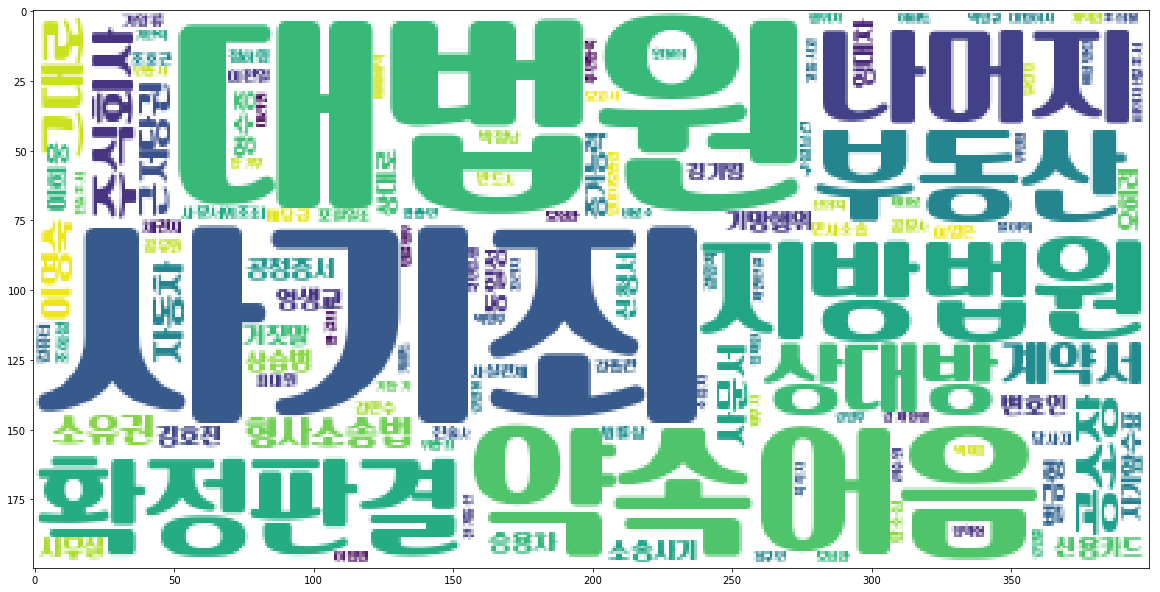

['절도', '강도', '강도상해', '강도살인']


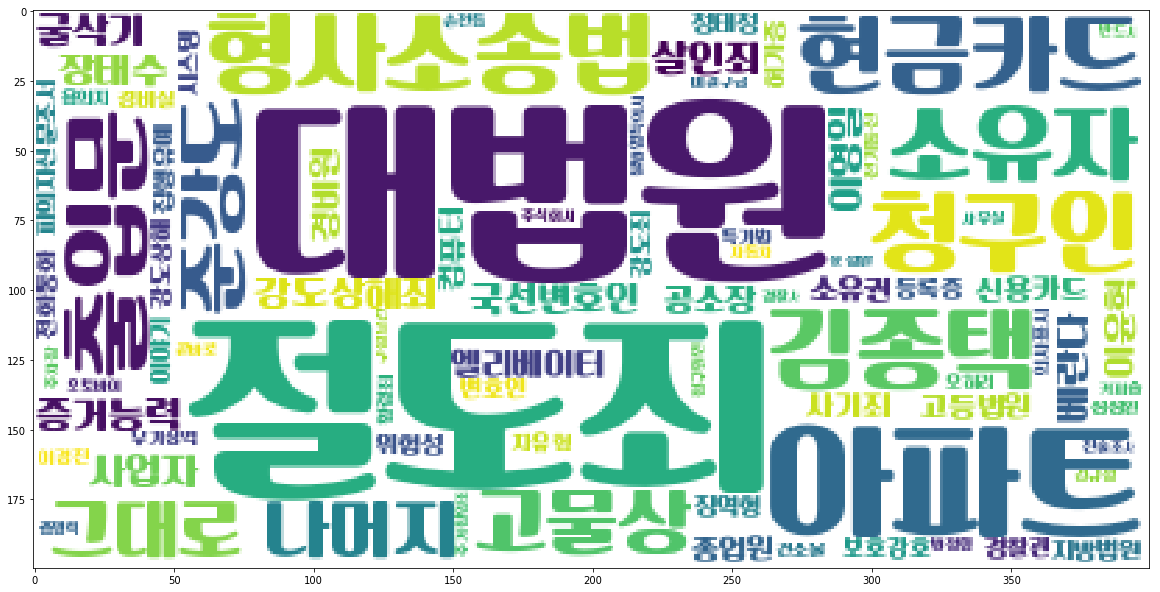

['권리행사']


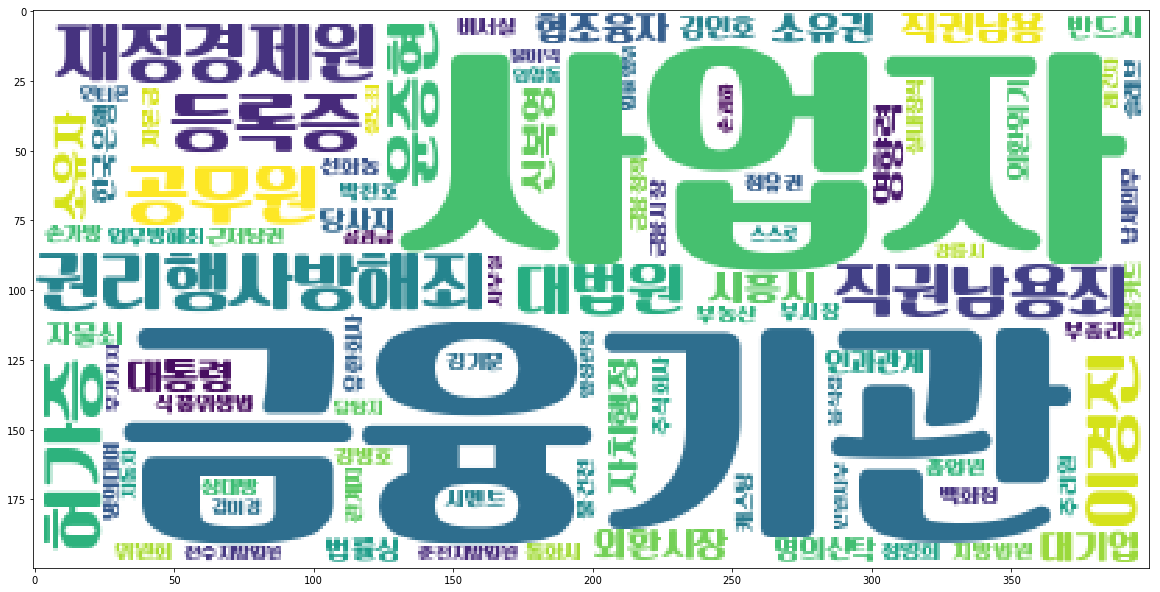

['유가증권', '우표', '인지']


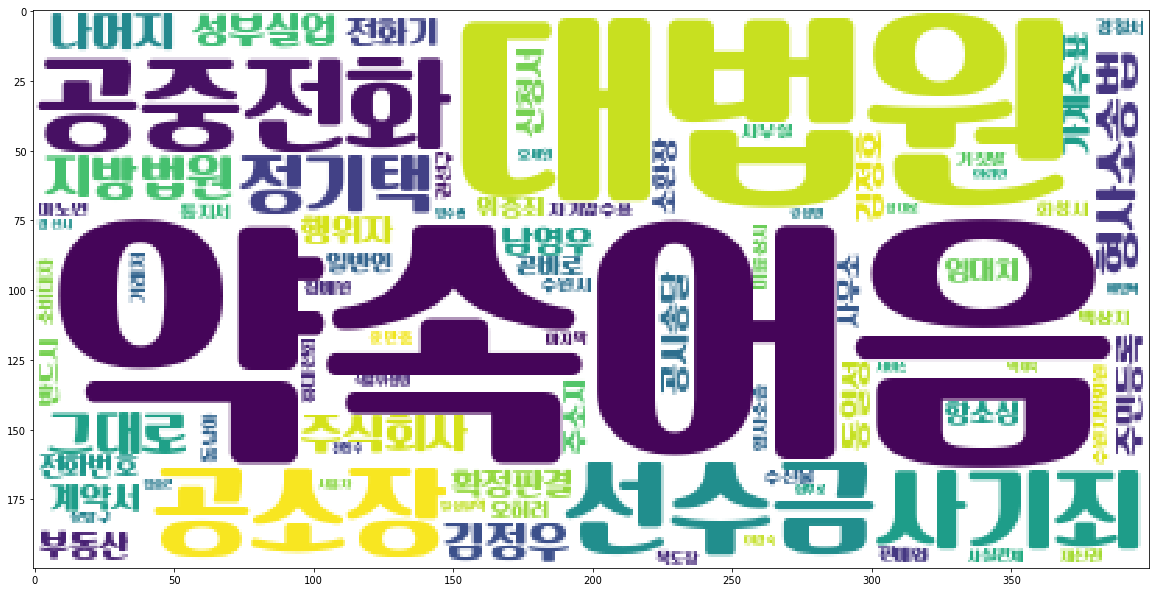

['살인']


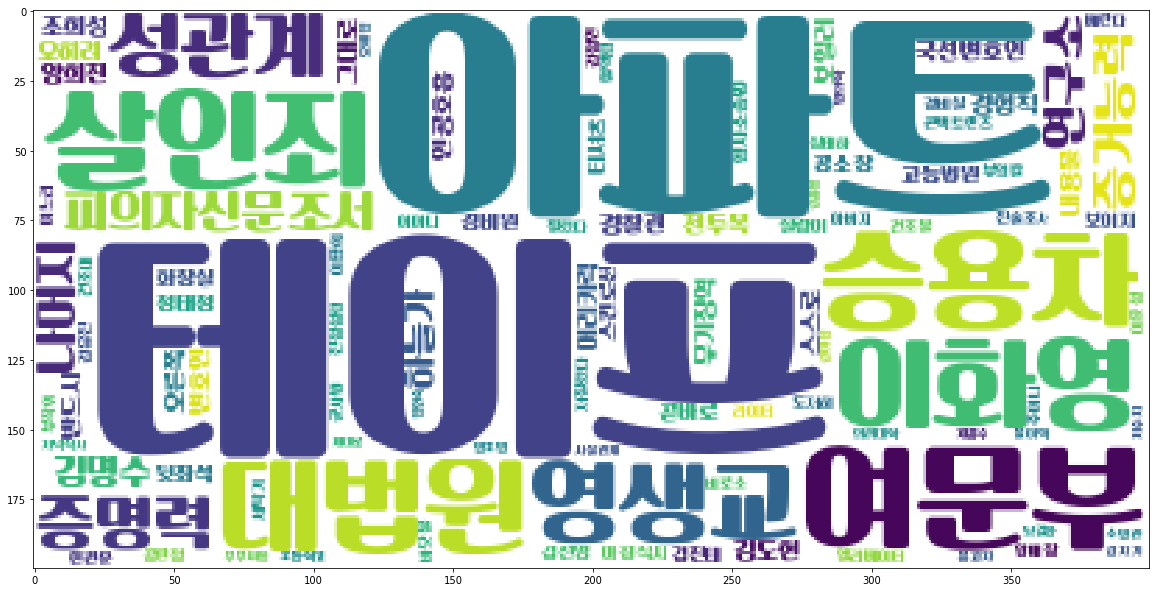

['폭발물']


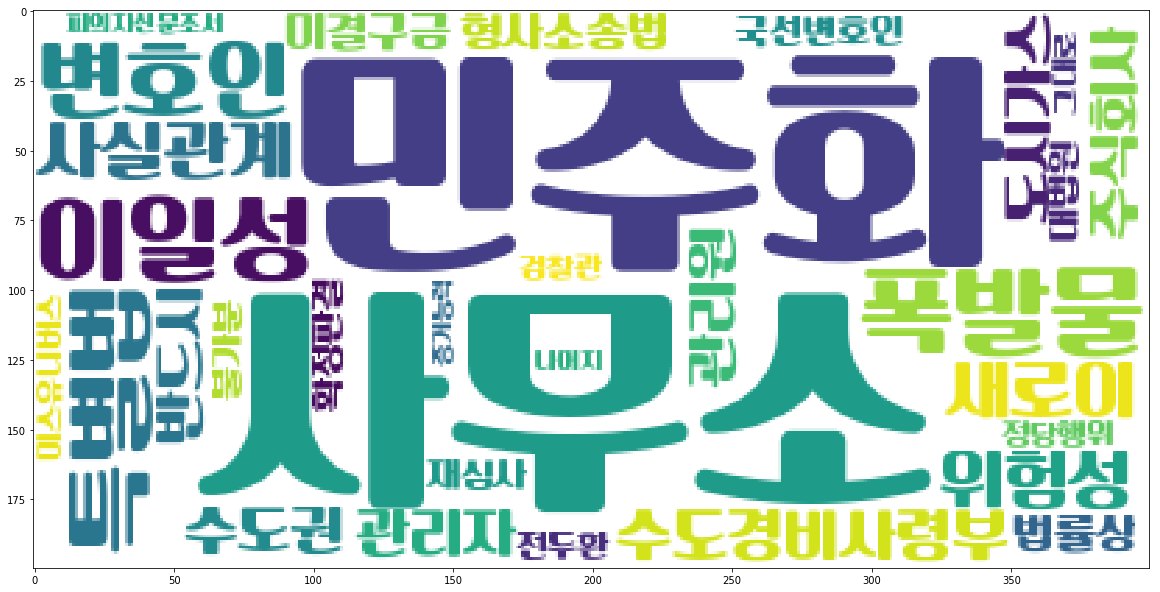

['약취', '유인', '인신매매']


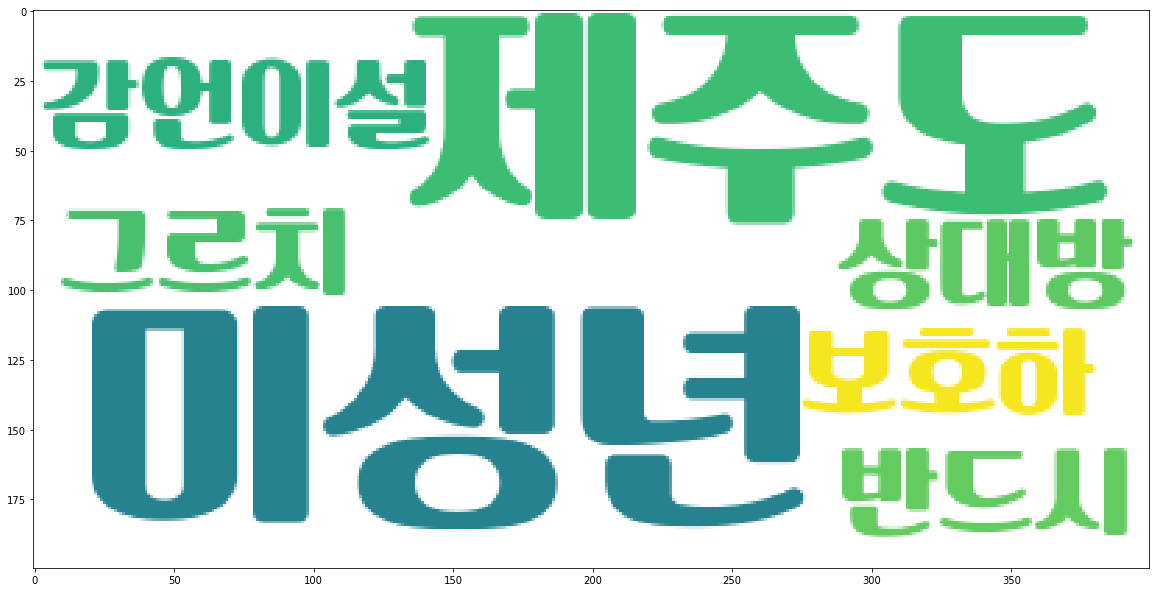

['도박', '복표']


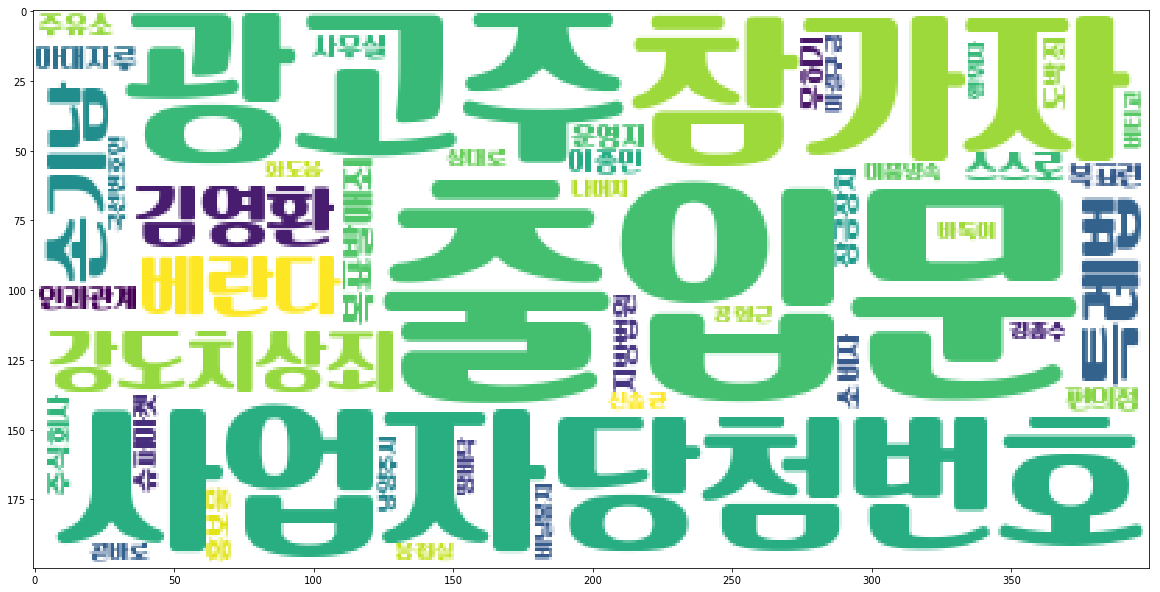

['상해', '폭행', '상해치사', '상해치상']


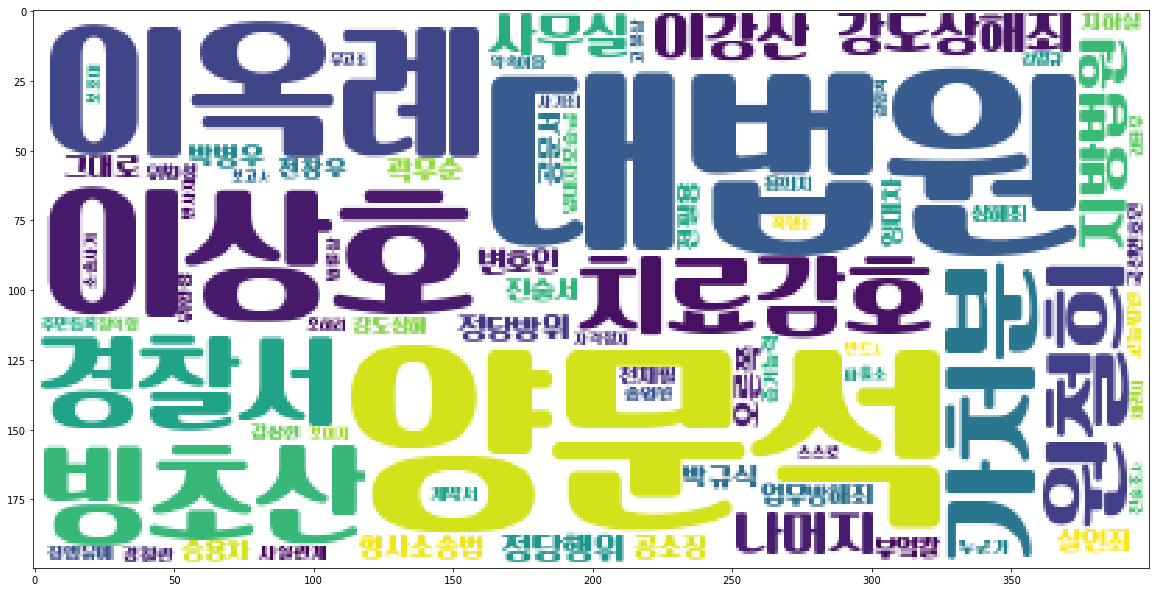

['명예', '모욕']


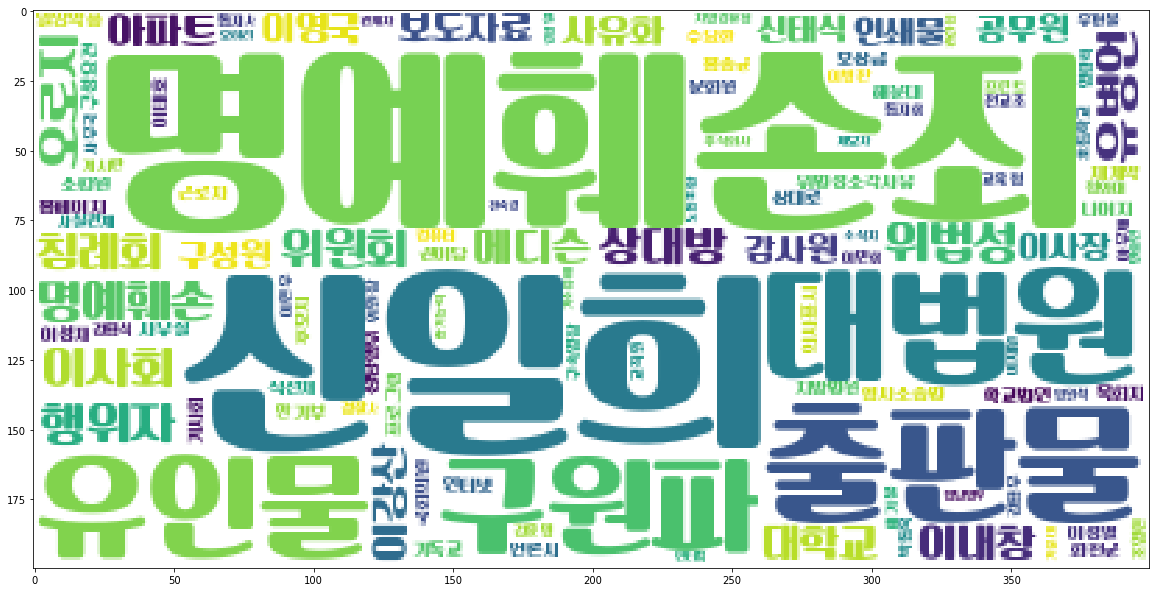

In [47]:
noodles = ["피고인", "피해자", "이경선", "따라서", "이승광", "강경식", "최수희","로부터", "것이므", "가능성"]
key = iter([i for i in tmp_dict])
def draw_cloud(idx):
    dt = nltk.Text([i for j in tmp_dict[idx] for i in j if (len(i)>2)& (i not in noodles)], name = keywords[idx])
    dt2 = dt.vocab().most_common(500)
    dt3 = dict(dt2)
    cld = WordCloud(font_path = font_fname,
                     relative_scaling = 0.1,
                     background_color = "white")
    cld2 = cld.generate_from_frequencies(dt3)
    plt.figure(figsize=(20,15))
    plt.imshow(cld2)
    plt.axis=("off")
    plt.show()

for i in key:
    print(keywords[i])
    draw_cloud(i)


['사기', '공갈', '부당이득']


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['KoreanBRRNAR'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


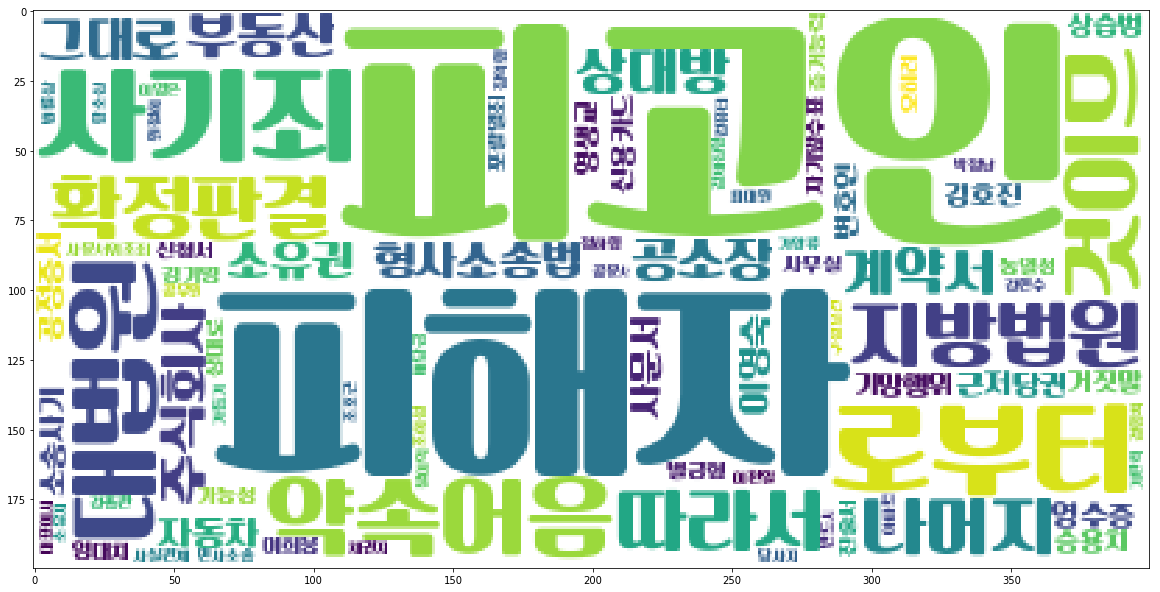

['절도', '강도', '강도상해', '강도살인']


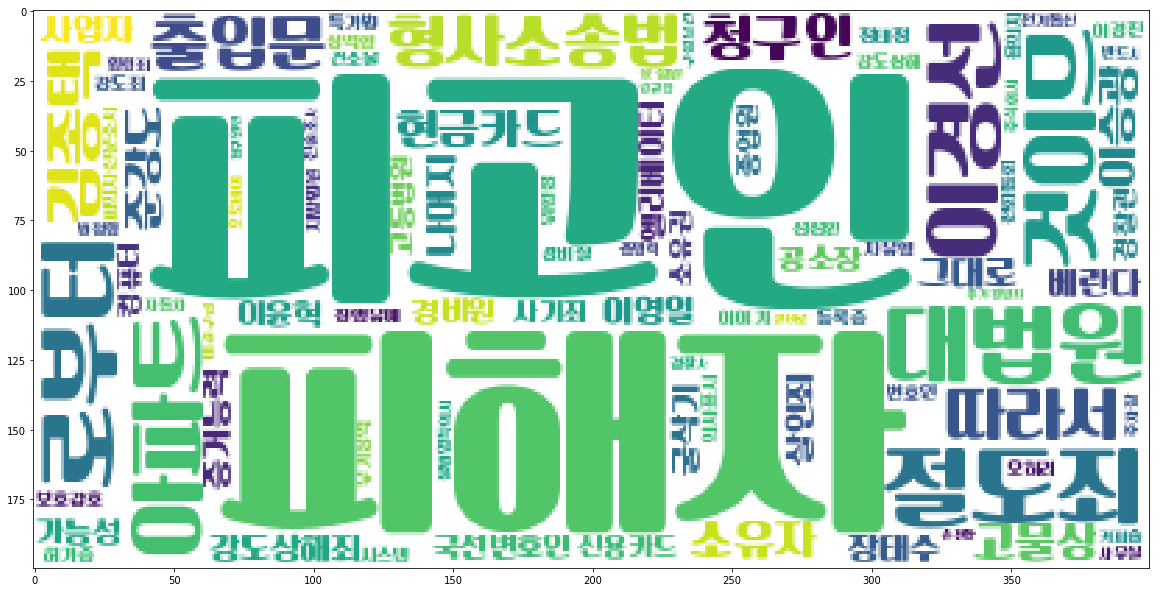

['권리행사']


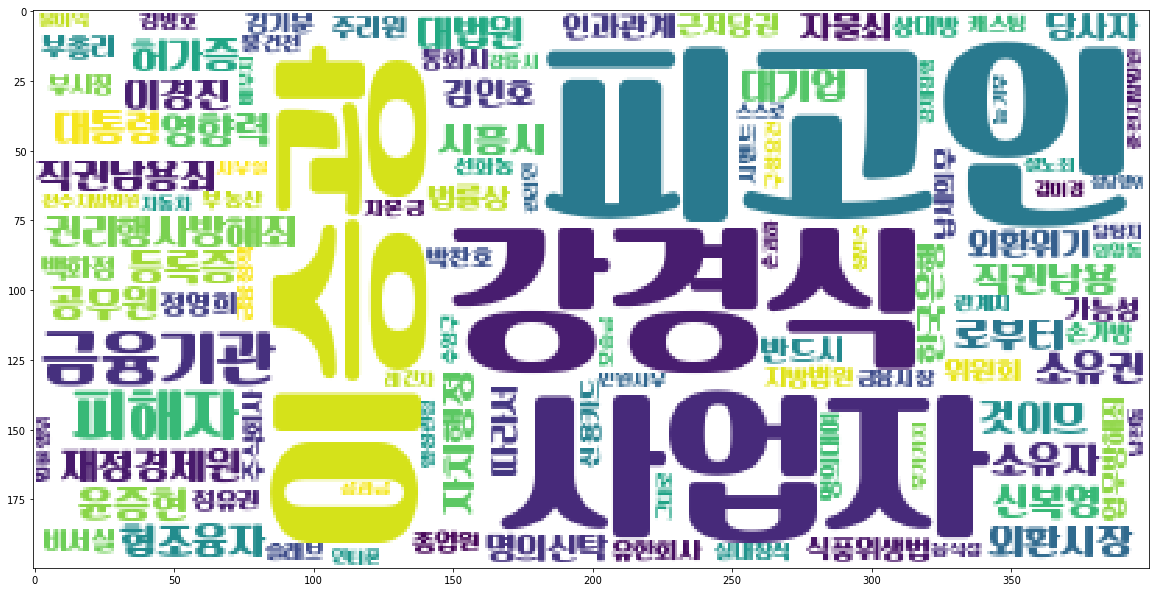

['유가증권', '우표', '인지']


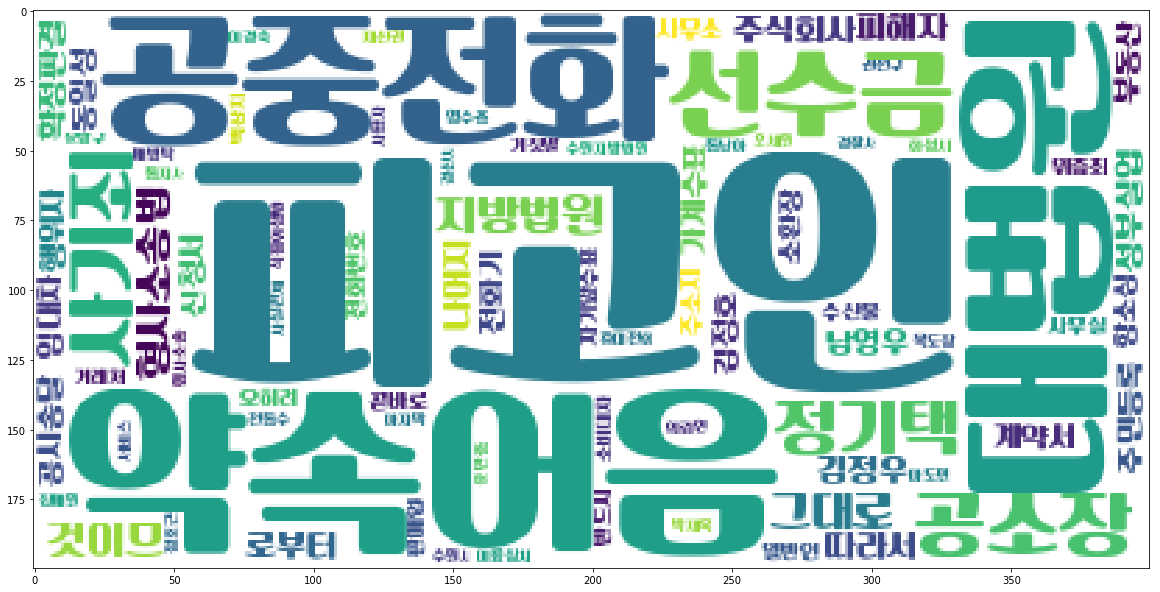

['살인']


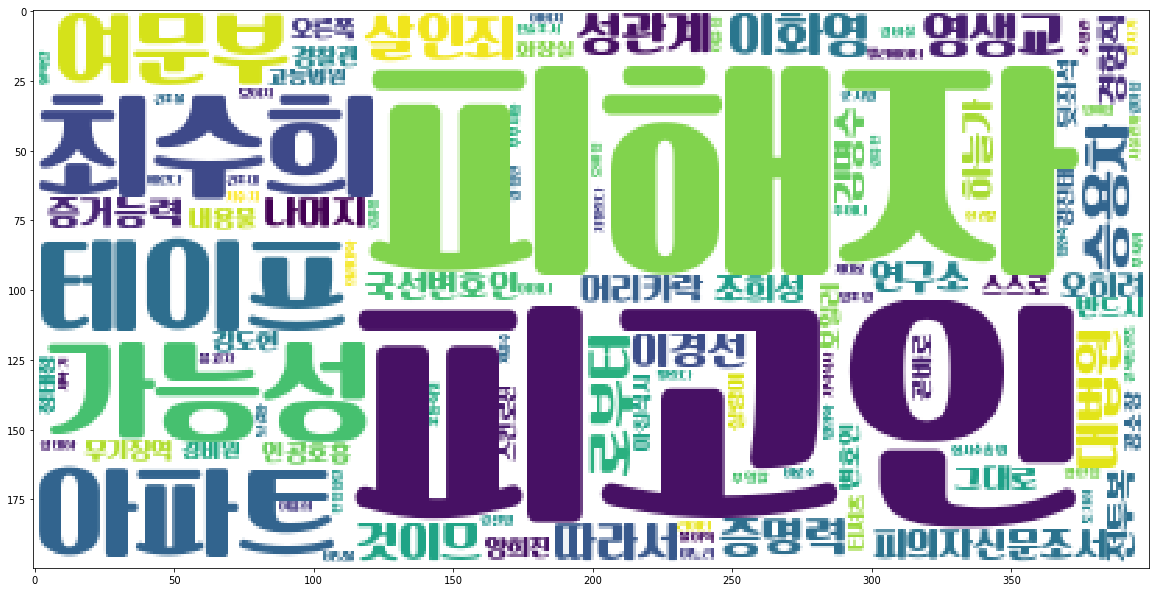

['폭발물']


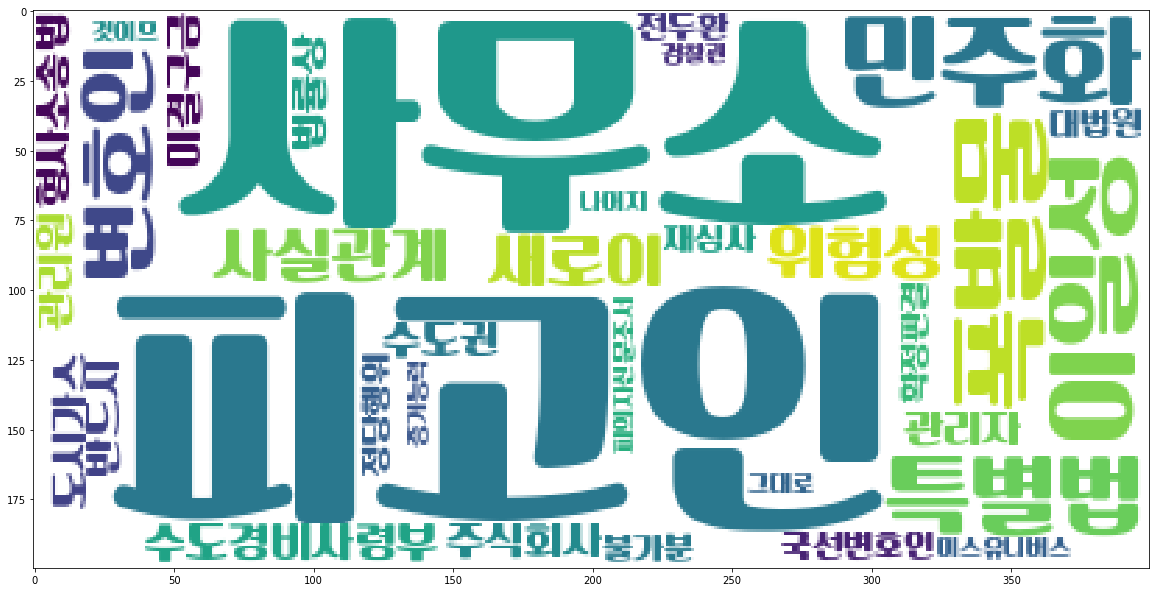

['약취', '유인', '인신매매']


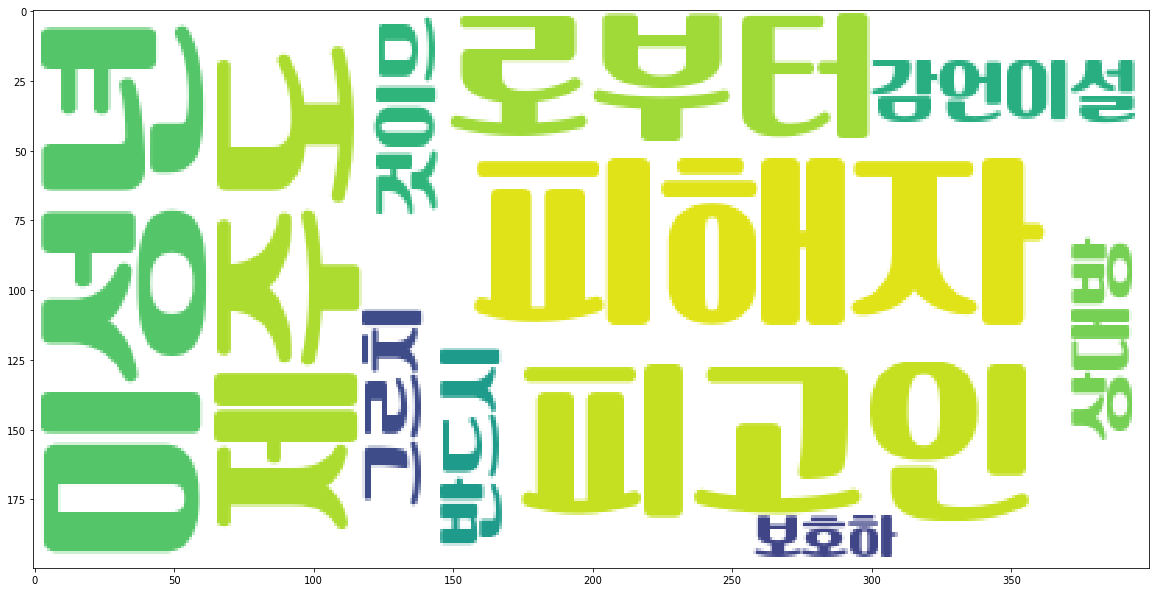

['도박', '복표']


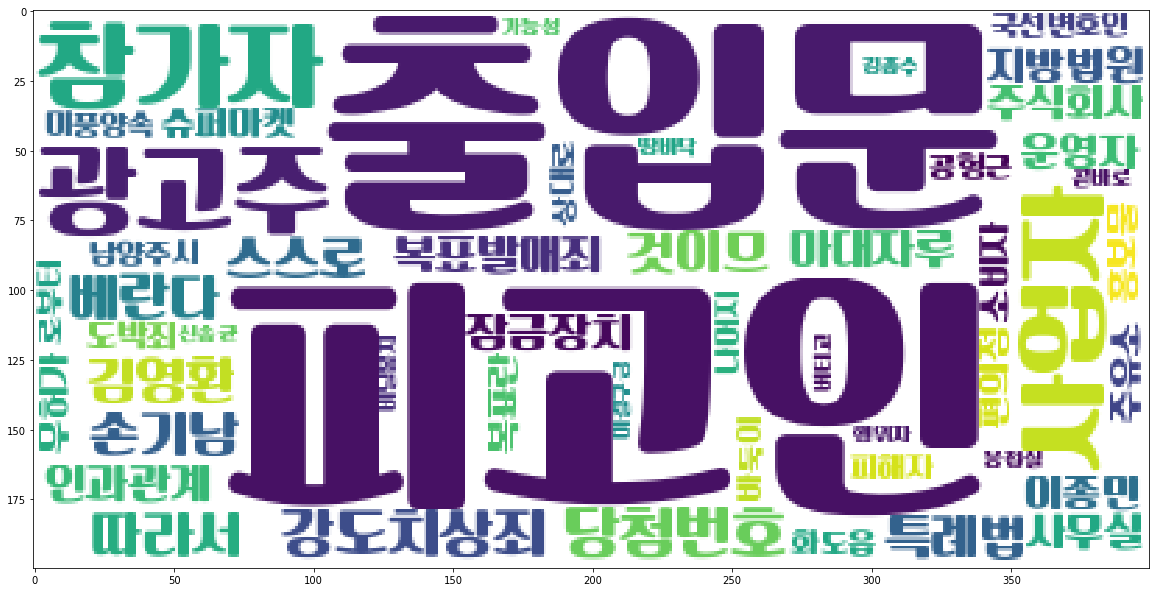

['상해', '폭행', '상해치사', '상해치상']


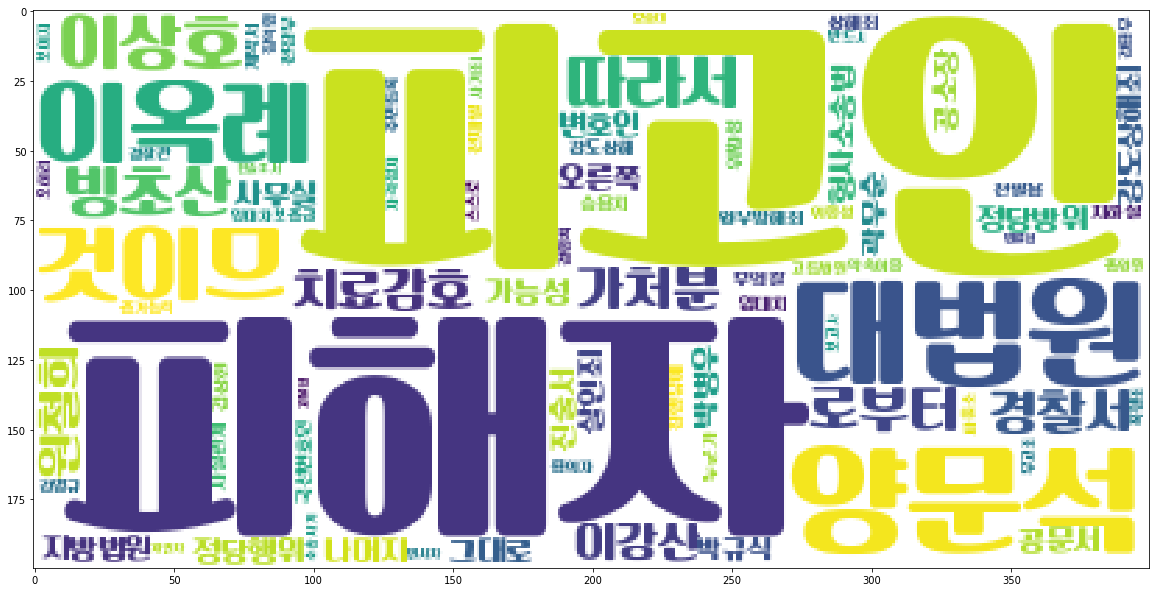

['명예', '모욕']


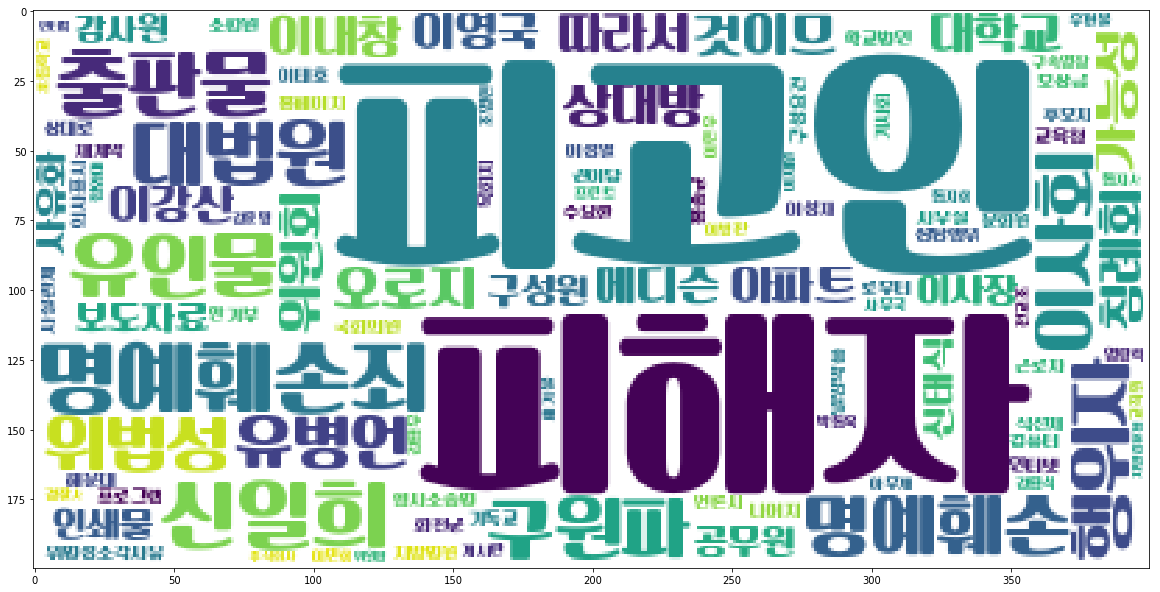

In [37]:
key = iter([i for i in tmp_dict])
def draw_cloud(idx):
    dt = nltk.Text([i for j in tmp_dict[idx] for i in j if (len(i)>2)], name = keywords[idx])
    dt2 = dt.vocab().most_common(500)
    dt3 = dict(dt2)
    cld = WordCloud(font_path = font_fname,
                     relative_scaling = 0.15,
                     background_color = "white")
    cld2 = cld.generate_from_frequencies(dt3)
    plt.figure(figsize=(20,15))
    plt.imshow(cld2)
    plt.axis=("off")
    plt.show()

for i in key:
    print(keywords[i])
    draw_cloud(i)


In [14]:
data_label[data_label[1] == 1]

사건명         참조조문  \
prncYd                                                                   
129611                                               내란방조  형사소송법 제325조   
180558  (가)내란목적살인,(나)내란수괴미수,(다)내란중요임무종사미수,(라)증거은닉,(마)살...          NaN   

                                                     판결요지  \
prncYd                                                      
129611  10·26 사태와 관련한 내란방조죄의 재심사건에서 당해 공소사실에 대하여 범죄사실의...   
180558  1. 법정외에서 증인신문을 실시함에 있어서 피고인에 대하여 통지하지 아니하여 참여 ...   

                                                     판례내용  \
prncYd                                                      
129611  【피 고 인】 정승화\n【변 호 인】 변호사 홍성우외 2인\n【주    문】\n  ...   
180558  【피고인, 상고인】   1.(가.나.)                     2.(가...   

                                                     판시사항  1  2  3  4  5 ...  \
prncYd                                                                   ...   
129611  10·26 사태와 관련한 내란방조죄의 재심사건에서 당해 공소사실에 대하여 범죄사실의...  1  0  0  0  0 ...   
180558  1. 피고인에 대한 통지없이 법정외에서 한 증인신문 결과에 대하여 피고인이 그 후 ...  1  0  0  0  0 ...   

        33  34  35  36  37  38  39  40  41  42  
prncYd                                          
129611   0   0   0   0   0   0   0   0   0   0  
180558   0   0   0   0   0   0   0   0   0   0  

[2 rows x 47 columns]

In [11]:
data_refd[data_refd[1] == 1]

사건명  \
prncYd                                                      
74402                                국가보안법위반·반공법위반·간첩피고사건   
84393                                      국가보안법위반·반란예비음모   
129611                                               내란방조   
86747                                     간첩,국가보안법위반,간첩방조   
177560             내란음모·국가보안법위반(찬양·고무등)·내란선동(내란음모에 관한 사건)   
180558  (가)내란목적살인,(나)내란수괴미수,(다)내란중요임무종사미수,(라)증거은닉,(마)살...   
180524  반란수괴·반란모의참여·반란중요임무종사·불법진퇴·지휘관계엄지역수소이탈·상관살해·상관살...   

                                                     참조조문  \
prncYd                                                      
74402                      형법 제91조\n, \n        국가보안법 제2조   
84393                        국가보안법 제1조, \n        형법 제87조   
129611                                        형사소송법 제325조   
86747   구 형법 제85조, \n        구 형법 제87조, \n        형법 제...   
177560  [1] 형사소송법 제118조, 제219조 / [2] 통신비밀보호법 제9조 제1항, ...   
180558                                               None   
180524  [1] \n\n        형법 제87조\n, \n\n        군형법 제5조...   

                                                     판결요지  \
prncYd                                                      
74402   간첩이라함은 적국이나 북한괴뢰집단을 위하여 국가기밀을 탐지 수집하는 행위를 말하는 ...   
84393   피고인들이 무력으로 현정부를 전복하고 국회의 기능을 정지하며 소장급이상의 육·해·공...   
129611  10·26 사태와 관련한 내란방조죄의 재심사건에서 당해 공소사실에 대하여 범죄사실의...   
86747   간첩할 목적으로 월남한 경우에는 남한지역에 입국함과 동시에 간첩착수로 볼 것이고 남...   
177560  [1] 형사소송법 제219조가 준용하는 제118조는 “압수·수색영장은 처분을 받는 ...   
180558  1. 법정외에서 증인신문을 실시함에 있어서 피고인에 대하여 통지하지 아니하여 참여 ...   
180524  [1] [다수의견] 우리 나라는 제헌헌법의 제정을 통하여 국민주권주의, 자유민주주의...   

                                                     판례내용  \
prncYd                                                      
74402   【피 고 인】 \n【항 소 인】   피고인들 및 검사\n【원심판결】 \n제1심 \n...   
84393   【피고인, 상고인】 \n【변 호 인】 변호사 오연근외 3인\n【원판결】 육군고등군법...   
129611  【피 고 인】 정승화\n【변 호 인】 변호사 홍성우외 2인\n【주    문】\n  ...   
86747   【상 고 인】   검사 김병두\n【상고인, 피고인】 \n【원심판결】 \n제1심 서울...   
177560  【피 고 인】 \n【상 고 인】 피고인들 및 검사\n【변 호 인】 법무법인(유한) ...   
180558  【피고인, 상고인】   1.(가.나.)                     2.(가...   
180524  【피고인】 \n【상고인】   피고인들 및 검사\n【변호인】   변호사 \n【원심판결...   

                                                     판시사항  1  2  3  4  5 ...  \
prncYd                                                                   ...   
74402                                            간첩행위의 의미  1  0  0  0  0 ...   
84393                 국가보안법 1조의 「정부를 참칭하고 국가를 변란할 목적」의 의의  1  0  0  0  0 ...   
129611  10·26 사태와 관련한 내란방조죄의 재심사건에서 당해 공소사실에 대하여 범죄사실의...  1  0  0  0  0 ...   
86747   가. 밀봉교육을 받고 월남하여 동지 포섭 또는 접선한 사실이 있을 뿐 사실상 기밀의...  1  1  0  0  0 ...   
177560  [1] 압수·수색영장의 제시가 현실적으로 불가능한 경우, 영장제시 없이 이루어진 압...  1  0  0  0  0 ...   
180558  1. 피고인에 대한 통지없이 법정외에서 한 증인신문 결과에 대하여 피고인이 그 후 ...  1  0  0  0  0 ...   
180524  [1] 군사반란과 내란을 통하여 정권을 장악한 경우의 가벌성 여부(적극)\n[2] ...  1  0  0  0  0 ...   

        33  34  35  36  37  38  39  40  41  42  
prncYd                                          
74402    0   0   0   0   0   0   0   0   0   0  
84393    0   0   0   0   0   0   0   0   0   0  
129611   0   0   0   0   0   0   0   0   0   0  
86747    0   0   0   0   0   0   0   0   0   0  
177560   0   0   0   0   0   0   0   0   0   0  
180558   0   0   0   0   0   0   0   0   0   0  
180524   0   0   0   0   0   0   0   0   0   0  

[7 rows x 47 columns]

In [ ]:
##################
#전체 데이터에서 콜롬 1-42 원핫코딩중 아무것도 1에 해당하지 않는 데이터제거
#남은 데이터의 갯수는 8066

remove = []
for index, row in data_refd.iterrows():
    x = row[5:]
    if sum(x) == 0:
        remove.append(index)
len(remove)
remove[1]
for i in remove:
    data_refd.drop(i, inplace = True)
len(data_refd)


In [58]:
### 띄어쓰기, 문장구분 전처리
data_cont = pd.DataFrame()
data_cont["내용"]=data_refd.판례내용
contents = []
for index, row in data_cont.iterrows():
    r = row["내용"].replace('\r', '').replace('\n', '').replace(",", " ").replace("  ","")
    contents.append(r)
contents[3]
len(contents)


/home/lyusungwon/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  app.launch_new_instance()


0                                                  1
prncYd                                                             
73888   【이    유】    직권으로 살피건대, 원심은 피고인이 공소외 백남원, 장복순과 공동하여 영리의 목...
67312       【이유】    공직선거및선거부정방지법(이하 '공직선거법'이라 한다)은 제9장에서 선거에 즈음한...
67316       【이유】                                   1. 이 사건 공소사실의 요지
67151       【이유】  1. 이 사건 공소사실의 요지는, 서울 광진구 자양3동 482의 5 소재 머릿돌 교...
67258       【이유】  약속어음을 할인을 위하여 교부받은 수탁자는 위탁의 취지에 따라 보관하는 것에 불과하...
67135       【이유】                                        상고이유를 판단한다.
67223       【이유】                                   1. 이 사건 공소사실의 요지
67256       【이유】    원심판결 이유에 의하면 원심은, 피고인이 1999. 1. 무렵부터 2001. 1...
71101   【이    유】                                        1. 항소이유의 요지
67308       【이유】                   교통사고처리특례법 제4조 제1항은 교통사고를 일으킨 차가 
67309       【이유】                                          상고이유를 본다.
67311       【이유】                                    검사의 상고이유를 판단한다.
67148       【이유】                                 1. 피고인들의 상고이유에 대하여
68369   【이    유】                                        1. 공소사실의 요지
67248       【이유】                                1. 피고인의 상고이유에 대한 판단
67252       【이유】                                          1. 원심의 판단
67231       【이유】                                          1. 원심의 판단
67342       【이유】                                                 1.
67250       【이유】                                         상고이유를 본다. 
67230       【이유】                                          1. 원심의 판단
67228       【이유】                                          상고이유를 본다.
67307       【이유】                                          상고이유를 본다.
67180   【이    유】                     1. 이 사건 범죄사실 중 범죄단체 구성의 점에 대하여
67189       【이유】                                      1. 폭행의 점에 대하여
67239       【이유】    원심판결 이유에 의하면 원심은, 그 채용 증거에 의하여 판시 사실을 인정한 다음...
67210       【이유】           1. 원심이 유지한 제1심이 적법하게 조사하여 채택한 증거들에 의하면, 
67207       【이유】                                 1. 피고인들의 상고이유를 본다.
67211       【이유】                        피고인들과 국선변호인의 상고이유를 함께 판단한다.
67209       【이유】                                          상고이유를 본다.
67287       【이유】                                    검사의 상고이유를 판단한다.
...          ...                                                ...
183732  【이    유】        【범죄사실】피고인은 중화인민공화국 국적의 외국인으로, 마약류 취급자가 아니다.
183740  【이    유】                                        1. 항소이유의 요지
183743  【이    유】                                        1. 항소이유의 요지
183745  【이    유】                                       【범죄사실】[전제사실]
183746  【이    유】                    【범죄사실】 1. 피고인 우영헌, 같은 문성일의 공동범행
184023  【이    유】                                        상고이유를 판단한다.
184094  【이    유】                                        상고이유를 판단한다.
184238  【이    유】    상고이유(상고이유서 제출기간이 경과한 후에 제출된 상고이유보충서의 기재는 상고이...
184252  【이    유】                                     1. 상고이유를 판단한다.
184253  【이    유】                                        상고이유를 판단한다.
183778  【이    유】                                        1. 공소사실의 요지
183689  【이    유】                                        상고이유를 판단한다.
184287  【이    유】  【범죄사실】  피고인은 자동문 설치업자이고, 피해자 권오철은 부산 기장군 장안읍 길...
184289  【이    유】                                  1. 항소이유의 요지(법리오해)
184290  【이    유】                                 【범죄사실】『2014고단7204』
184292  【이    유】                 【범죄사실】  피고인은 (주)알프 대전애완동물경매장 업주이다.
183781  【이    유】                                        1. 항소이유의 요지
184027  【이    유】                            1. 피고인 박기춘의 상고이유에 대한 판단
184030  【이    유】                                        상고이유를 판단한다.
183678  【이    유】                                        상고이유를 판단한다.
183690  【이    유】                                        상고이유를 판단한다.
183804  【이    유】                                       1. 상고이유를 본다.
184231  【이    유】                                        상고이유를 판단한다.
184012  【이    유】                                        상고이유를 판단한다.
184192  【이    유】                              1. 당심에서의 공소장변경 - 직권판단
183803  【이    유】                                        상고이유를 판단한다.
184

In [94]:
######## 내용안에서 [이유] 다음 문장을 다 뽑음
contents2 = []
for sen in contents:
    p = re.compile("【이유】")
    index = [m.end() for m in p.finditer(sen)]
    if len(index) > 0 :
        for i in index:
            contents2.append(sen[i:])
    elif len(index) == 0 :
            contents2.append("None")
len(contents2)

['  직권으로 살피건대, 원심은 피고인이 공소외 백남원, 장복순과 공동하여 영리의 목적으로 1973.1.경부터 1975.5.1.경까지 사이에 전주시 전동 1가 212의 5소재 백남원집에서 마약인 "몰핀" 및 "코데잉"용액을 판매한 것이라는 공소사실을 인정하여 처단하였다.',
 "  공직선거및선거부정방지법(이하 '공직선거법'이라 한다)은 제9장에서 선거에 즈음한 정당활동을 규제하는 등 일정한 제한을 가하고 있지만 전면적인 제한을 가하고 있지 아니할 뿐만 아니라, ",
 '  1. 이 사건 공소사실의 요지',
 '1. 이 사건 공소사실의 요지는, 서울 광진구 자양3동 482의 5 소재 머릿돌 교회 신축공사현장을 총괄하는 책임자인 피고인이 2000. 6. 10. 07:00경 위 공사현장 1층 주차장 정화조 맨홀(직경 60cm, 깊이 530cm) 입구를 높이는 공사를 작업 인부인 ',
 '약속어음을 할인을 위하여 교부받은 수탁자는 위탁의 취지에 따라 보관하는 것에 불과하므로, 위탁된 약속어음을 수탁자가 자신의 채무변제에 충당하였다면 이와 같은 수탁자의 행위는 위탁의 취지에 반하는 것으로서 횡령죄를 구성한다(',
 '  상고이유를 판단한다.',
 '  1. 이 사건 공소사실의 요지',
 '  원심판결 이유에 의하면 원심은, 피고인이 1999. 1. 무렵부터 2001. 11.까지 의료용구가 아닌 즉석 찜질팩에 "담들고 결릴 때, 노인성 각종 통증에, 출산 후 산후조리에" 등 의학적 효능·효과 등이 있는 것으로 오인될 우려가 있는 표시를 하여 이를 판매하였다는 공소사실에 대하여, \'담\'이라 함은 접질리거나 삔 부위에 몸을 순환하던 분비액이 응결되어 결리고 아픈 증상으로서 구체적인 병명에 해당하고, \'결리다\'는 표현은 몸의 어떤 부분이 당기어서 뜨끔한 아픔을 느끼는 것을 말하는 것인바, 위와 같은 각종 증상에 따라 찜질팩을 대는 신체부위를 그림으로 설명하고 있다면 위 즉석 찜질팩이 마치 특정 질병의 치료를 직접적이고 주된 목적으로 하는 것으로서 의학적 효능·효과가 

In [ ]:
#################
### 문서에서 punctuation 제거 숫자는 의미가 잇을거 같기도해서 일단 남김
contents3 =[]
for sen in contents2:
    p = re.compile("\W")
    r = re.sub(p," ", sen)
    contents3.append(r)

contents3
len(contents3)

In [60]:
twitter = Twitter()
## 위에 정리된 content3 문장에서 조사 제외, 형법제외 그리고 단어길이가 1인거 제외
## 단어길이가 1인것중에서 쓸데없고 의미없는 것들이 명사로 잡히는경우가 너무 많음...
temp = []
for i in range(len(contents3)):
    ss = twitter.pos(contents3[i], norm=True, stem= True)
    ah = []
    for wh in ss:
        if wh[1] != "Josa" and wh[0] != "형법" and len(wh[0]) > 1:
            ah.append(wh)
    temp.append(ah)
    
#temp 문장을 다 뽑으니 전체에 대해서는 내 노트북에서 너무 오래걸림.. 성원이의 슈퍼컴으로 확인부탁;;

[['직권/Noun',
  '으로/Josa',
  '살피다/Verb',
  ',/Punctuation',
  '원심/Noun',
  '은/Josa',
  '피고인/Noun',
  '이/Josa',
  '공소/Noun',
  '외/Noun',
  '백남원/Noun',
  ',/Punctuation',
  '장복/Noun',
  '순/Noun',
  '과/Josa',
  '공동/Noun',
  '하다/Verb',
  '영리/Noun',
  '의/Josa',
  '목적/Noun',
  '으로/Josa',
  '1973/Number',
  './Punctuation',
  '1/Number',
  './Punctuation',
  '경/Noun',
  '부터/Josa',
  '1975/Number',
  './Punctuation',
  '5/Number',
  './Punctuation',
  '1/Number',
  './Punctuation',
  '경/Noun',
  '까지/Josa',
  '사이/Noun',
  '에/Josa',
  '전주시/Noun',
  '전동/Noun',
  '1/Number',
  '가다/Verb',
  '212/Number',
  '의/Noun',
  '5/Number',
  '소재/Noun',
  '백남원/Noun',
  '집/Noun',
  '에서/Josa',
  '마약/Noun',
  '인/Josa',
  '"/Punctuation',
  '몰핀/Noun',
  '"/Punctuation',
  '및/Noun',
  '"/Punctuation',
  '코데잉/Noun',
  '"/Punctuation',
  '용액/Noun',
  '을/Josa',
  '판매/Noun',
  '한/Josa',
  '것/Noun',
  '이라는/Josa',
  '공소/Noun',
  '사실/Noun',
  '을/Josa',
  '인정/Noun',
  '하다/Verb',
  '처단/Noun',
  '하다/Verb',
  './Punctuation']

In [61]:
token = [t for d in temp for t in d]
print(len(token))

text = nltk.Text(token, name="NMSC")
print(text.vocab().most_common(100))

405703
[('하다/Verb', 20655), ('./Punctuation', 20384), ('의/Josa', 18438), ('이유/Noun', 16438), ('를/Josa', 12473), ('상고/Noun', 12227), ('에/Josa', 10943), ('피고인/Noun', 9771), ('을/Josa', 7849), (',/Punctuation', 7466), ('1/Number', 6941), ('판단/Noun', 6307), ('이/Josa', 6035), ('보다/Verb', 5252), ('은/Josa', 5144), ('사실/Noun', 4267), ('요지/Noun', 3802), ('항소/Noun', 3669), ('원심/Noun', 3461), ('있다/Adjective', 3387), ('는/Josa', 3229), ('것/Noun', 3214), ('검사/Noun', 2839), ('변호인/Noun', 2552), ('되다/Verb', 2499), ('한/Josa', 2433), ('제/Noun', 2355), ('로/Josa', 2286), ('그/Noun', 2168), ('대하다/Verb', 2080), ('으로/Josa', 2073), ('(/Punctuation', 2057), ('판결/Noun', 1971), ('가/Josa', 1847), ('점/Noun', 1795), (')/Punctuation', 1783), ('범죄/Noun', 1707), ('없다/Adjective', 1691), ('에서/Josa', 1661), ('및/Noun', 1608), ('공소/Noun', 1590), ('들/Suffix', 1585), ('과/Josa', 1535), ('위/Noun', 1489), ('의/Noun', 1480), ('대한/Noun', 1450), ('이/Noun', 1375), ('인정/Noun', 1361), ('사건/Noun', 1279), ('서/Josa', 1230), ('등/Noun', 1200)

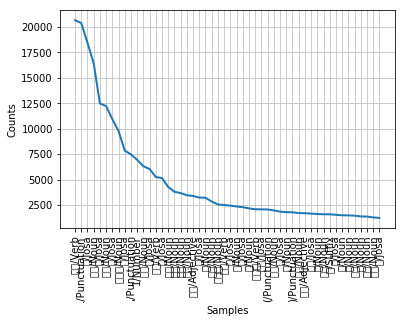

In [62]:
text.plot(50)

In [63]:
sentences = list()
cnt = 0
for i in temp:
    sentences.append(models.doc2vec.LabeledSentence(words=i, tags=["SENT_{}".format(cnt)]))
    cnt+=1

In [66]:
len(sentences)

18189

In [65]:
class LabeledLineSentence(object):
    def __init__(self, filename):
        self.filename = filename
    def __iter__(self):
        for uid, line in enumerate(open(filename)):
            yield LabeledSentence(words=line.split(), labels=['SENT_%s' % uid])
            
model = models.Doc2Vec(alpha=.025, min_alpha=.025, min_count=1)
model.build_vocab(sentences)

for epoch in range(10):
    model.train(sentences, total_examples=model.corpus_count, epochs=model.iter)
    model.alpha -= 0.002
    model.min_alpha = model.alpha
model.save("my_model.doc2vec")
model_loaded = models.Doc2Vec.load('my_model.doc2vec')
print(model_loaded.docvecs.most_similar(["SENT_1"]))

[('SENT_11064', 0.6897157430648804), ('SENT_16196', 0.6851186752319336), ('SENT_11529', 0.6740739941596985), ('SENT_1181', 0.6720500588417053), ('SENT_6162', 0.6632632613182068), ('SENT_14566', 0.661586344242096), ('SENT_12030', 0.6614383459091187), ('SENT_16303', 0.6608224511146545), ('SENT_11549', 0.6585075855255127), ('SENT_868', 0.6580309271812439)]


In [91]:
print(model_loaded.docvecs.most_similar(["SENT_2"]))
print(temp[0])
list(data_refd.iloc[[0], 3])
## 첫문장만 토큰화됨!
## 군 형법 제외!
## 조사, 숫자, Punctuation은 빼는걸로

[('SENT_517', 0.9775844812393188), ('SENT_16102', 0.9741731882095337), ('SENT_1883', 0.9741069078445435), ('SENT_12948', 0.9726770520210266), ('SENT_14305', 0.9724963307380676), ('SENT_2067', 0.9717785716056824), ('SENT_16500', 0.9709685444831848), ('SENT_15624', 0.9707512855529785), ('SENT_531', 0.968635082244873), ('SENT_12828', 0.9682379961013794)]
['직권/Noun', '으로/Josa', '살피다/Verb', ',/Punctuation', '원심/Noun', '은/Josa', '피고인/Noun', '이/Josa', '공소/Noun', '외/Noun', '백남원/Noun', ',/Punctuation', '장복/Noun', '순/Noun', '과/Josa', '공동/Noun', '하다/Verb', '영리/Noun', '의/Josa', '목적/Noun', '으로/Josa', '1973/Number', './Punctuation', '1/Number', './Punctuation', '경/Noun', '부터/Josa', '1975/Number', './Punctuation', '5/Number', './Punctuation', '1/Number', './Punctuation', '경/Noun', '까지/Josa', '사이/Noun', '에/Josa', '전주시/Noun', '전동/Noun', '1/Number', '가다/Verb', '212/Number', '의/Noun', '5/Number', '소재/Noun', '백남원/Noun', '집/Noun', '에서/Josa', '마약/Noun', '인/Josa', '"/Punctuation', '몰핀/Noun', '"/Punctuation',

['【피 고 인】   이정자\n【항 소 인】   피고인\n【원심판결】 \n제1심 전주지방법원 정읍지원(75고합25 판결)\n【주    문】\n  원심판결을 파기한다.\n  피고인을 징역 3년에 처한다.\n  원심판결선고전의 구금일수중 85일을 위 형에 산입한다.\n  그러나 이 재판확정일로부터 5년간 위 형의 집행을 유예한다.\n  압수된 주사기 및 플라스틱용기 각 1개(증 제3호), 약 "명신"3포(증 제9호), 플라스틱용기 226개(증 제10호), 주사기 2개(증 제11호), 앨콜램프 1개(증 제12호), 찍개 2개(증 제13호), 소형공병 1개(증 제14호), 청색천제쌈지 1개(증 제15호), 시장가구 1개(증 제16호), 소형대야 1개(증 제17호), 저울추 4개(증 제18호)를 몰수한다.\n\n【이    유】  직권으로 살피건대, 원심은 피고인이 공소외 백남원, 장복순과 공동하여 영리의 목적으로 1973.1.경부터 1975.5.1.경까지 사이에 전주시 전동 1가 212의 5소재 백남원집에서 마약인 "몰핀" 및 "코데잉"용액을 판매한 것이라는 공소사실을 인정하여 처단하였다.\n  그러나 원판결 적시의 증거에 피고인 및 증인 김정두, 장복순의 당심에서 한 진술을 종합하면, 피고인은 전시 일시장소에서 백남원, 장복순 모자가 영리의 목적으로 마약인 "몰핀" 및 "코데잉"용액을 마약중독자들에게 판매한다는 정을 알면서 동인들의 심부름으로 마약을 구입하려오는 사람에게 전달하여 줌으로서 위 마약판매행위를 방조한 사실을 인정할 수 있고 원심인정의 영리의 목적으로 마약을 판매한 동인들의 행위에 피고인이 공동으로 가담한 사실을 인정하기에는 부족하다.\n  그러므로 원심으로서는 마땅히 이에 대한 심리를 다하여 피고인의 소위에 대하여 동인들의 마약판매행위에 대한 종범으로 논단하였어야할 것이었고, 이와 같이 공동정범으로 기소한 공소사실에 대하여 보다 경한 같은 사실의 종범으로 문의하는 것이 검사의 공소에 대한 심판범위를 벗어나는 위법한 것이라고는 말할 수 없는 것이었다.\n 

In [10]:
# ref_data = data.dropna(subset=['참조조문'])
# ref_data.shape

# ref_crime_data = ref_data[ref_data.apply(lambda row: '형법' in row[3], axis = 1)]
# data[data.apply(lambda row: row['참조조문'].find('형법').any(), axis=1)]
# df.apply(lambda row: row.astype(str).str.contains('TEST').any(), axis=1)
# ref_crime_data

사건명  \
prncYd                                                      
73888                                           마약법위반피고사건   
67223                                             업무상과실치사   
71101                                             살인·감호청구   
67148   특정경제범죄가중처벌등에관한법률위반(배임)·특정경제범죄가중처벌등에관한법률위반(사기)·...   
68369                                       의료법위반·업무상과실치사   
67189                                             폭행·주거침입   
67211                              살인·폭력행위등처벌에관한법률위반·사체유기   
67362                                                업무방해   
67771                                    사기·사문서위조·위조사문서행사   
67513                        특정범죄가중처벌등에관한법률위반(조세)·석유사업법위반   
67496                                               건축법위반   
67381   사기·사기미수·공문서위조·위조공문서행사·사문서위조·위조사문서행사·절도·       ...   
67332                                   살인교사·살인·공갈미수·범인도피   
67498                       성폭력범죄의처벌및피해자보호등에관한법률위반(특수강간등)   
67500                                        재정신청기각에대한재항고   
177818                                       업무상배임·감사원법위반   
67482   특정범죄가중처벌등에관한법률위반(조세)·부동산실권리자명의등기에관한법률위반·제3자뇌물취...   
67601   성폭력범죄의처벌및피해자보호등에관한법률위반(특수강간등·특수강도강간등·주거침입 강간등)...   
67483                                             도로교통법위반   
67816                                       사서명위조·위조사서명행사   
67872                               집회및시위에관한법률위반·지방공무원법위반   
67874                                        방문판매등에관한법률위반   
68006   폭력행위등처벌에관한법률위반(야간·공동손괴)·폭력행위등처벌에관한법률위반(야간·공동상해...   
146480                                       항소기각결정에대한재항고   
68681                                 업무방해·노동조합및노동관계조정법위반   
67929                                    살인·미성년자의제강간·사체은닉   
68007                                            청소년보호법위반   
67804                                                강간치상   
67920                                             허위진단서작성   
76895                                         환경보전법위반피고사건   
...                                                   ...   
184250  적전초병특수폭행(인정된죄명:초병특수폭행)·적전초병특수협박(인정된죄명:초병특수협박)·...   
183075                                            공무상표시무효   
183078                                                 횡령   
184374                                                 사기   
184006                                   마약류관리에관한법률위반(향정)   
184106                            국민체육진흥법위반(도박개장등)·도박공간개설   
183083                           성폭력범죄의처벌등에관한특례법위반(강간등치상)   
183089                                              공기호위조   
184311                                           자동차관리법위반   
183966  사기·영유아보육법위반(허위회계보고를 하고 기본보육료를 지급받았다는 사실에 대하여 사...   
183090                   특정경제범죄가중처벌등에관한법률위반(배임)·농업협동조합법위반   
184235                                 살인(이른바 ‘이태원 살인사건’)   
183810  저작권법위반(피고인1·피고인2에대하여일부인정된죄명:저작권법위반방조·피고인3주식회사에...   
183967         정보통신망이용촉진및정보보호등에관한법률위반(정보통신망침해등)·개인정보보호법위반   
184020                                         무고·모해위증·횡령   
184110  특정경제범죄가중처벌등에관한법률위반(횡령)·사문서위조·위조사문서행사·사문서변조·변조사...   
183776                                              병역법위반   
183096                                         특수공무집행방해치상   
184094   식품위생법위반·업무상배임(부패가 진행 중인 양파와 건고추를 수입, 보관, 판매한 사건)   
184252                                   사문서위조·위조사문서행사·사기   
183778                                               재물손괴   
183689                                            동물보호법위반   
183781                                               업무방해   
183678                                   배임수재(인정된죄명:뇌물수수)   
183690          사기·보조금관리에관한법률위반(일부인정된죄명:보조금의예산및관리에관한법률위반)   
184231                                        교통사고처리특례법위반   
184012    관세법위반·특정범죄가중처벌등에관한법률위반(관세)·장물보관(인정된죄명:관세법위반)·사기   
184011           자본시장과금융투자업에관한법률위반·특정경제범죄가중처벌등에관한법률위반(횡령)   
184117                                            공직선거법위반   
183679                                               재물손괴   

                                                     참조조문  \
prncYd                                                      
73888                                         형사소송법 제298조   
67223   [1]\n\n         경찰관